In [11]:
%matplotlib inline
import os
os.environ['PY3_PROD'] = '1'
%load_ext autoreload
%autoreload 2
os.system('kinit')
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning) 

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [3]:
import sys
import pandas as pd
import copy
import numpy as np
import matplotlib as mpl
import matplotlib.dates as dates
import matplotlib.pyplot as plt
import datetime
import itertools
sys.path.append("C:/dev/pyktrader3/")
from pycmqlib3.utility import misc
from bktest import backtest
import pycmqlib3.analytics.data_handler as dh

In [4]:
ferrous_products_mkts = ['rb', 'hc', 'i', 'j', 'jm']
ferrous_mixed_mkts = ['ru', 'FG', 'ZC', 'SM', "SF", 'nr']
base_metal_mkts = ['cu', 'al', 'zn', 'pb', 'ni', 'sn', 'ss']
precious_metal_mkts = ['au', 'ag']
ind_metal_mkts = ferrous_products_mkts + ferrous_mixed_mkts + base_metal_mkts  
petro_chem_mkts = ['l', 'pp', 'v', 'TA', 'MA', 'bu', 'sc', 'fu', 'eg', 'eb', 'lu', 'pg'] 
ind_all_mkts = ind_metal_mkts + petro_chem_mkts
ags_oil_mkts = ['m', 'RM', 'y', 'p', 'OI', 'a', 'c', 'cs'] #, 'b']
ags_soft_mkts = ['CF', 'SR', 'jd', 'AP', 'sp', 'CJ', 'UR', 'SA'] # 'CY', 
ags_all_mkts = ags_oil_mkts + ags_soft_mkts
eq_fut_mkts = ['IF', 'IH', 'IC']
bond_fut_mkts = ['T', 'TF']
fin_all_mkts = eq_fut_mkts + bond_fut_mkts
commod_all_mkts = ind_all_mkts + ags_all_mkts + precious_metal_mkts
all_markets = commod_all_mkts + fin_all_mkts
daily_start_dict = { 'c': datetime.date(2011,1,1), 'm': datetime.date(2011,1,1),
    'y': datetime.date(2011,1,1), 'l': datetime.date(2011,1,1), 'rb':datetime.date(2011,1,1),
    'p': datetime.date(2011,1,1), 'cu':datetime.date(2011,1,1), 'al':datetime.date(2011,1,1),
    'zn':datetime.date(2011,1,1), 'au':datetime.date(2011,1,1), 'v': datetime.date(2011,1,1),
    'a': datetime.date(2011,1,1), 'ru':datetime.date(2011,1,1), 'ag':datetime.date(2012,6,1),
    'i': datetime.date(2014,1,1), 'j': datetime.date(2012,6,1), 'jm':datetime.date(2013,7,1),
    'CF':datetime.date(2012,5,1),  'TA':datetime.date(2012,4,15),
    'PM':datetime.date(2013,10,1), 'RM':datetime.date(2013,1,1),  'SR':datetime.date(2013,1,1),
    'FG':datetime.date(2013,1,1),  'OI':datetime.date(2013,5,1),  'RI':datetime.date(2013,1,1),
    'WH':datetime.date(2014,5,1),  'pp':datetime.date(2014,5,1),
    'IF':datetime.date(2010,5,1),  'MA':datetime.date(2012,1,1),  'TF':datetime.date(2014,6,1),
    'IH':datetime.date(2015,5,1),  'IC':datetime.date(2015,5,1),  'cs':datetime.date(2015,2,1),
    'jd':datetime.date(2014,5,1),  'ni':datetime.date(2015,5,1),  'sn':datetime.date(2017,4,1),
    'ZC':datetime.date(2013,11,1), 'hc':datetime.date(2016, 4, 1), 'SM': datetime.date(2017,1,1),
    'SF': datetime.date(2017,9,1), 'CY': datetime.date(2017, 9, 1), 'AP': datetime.date(2018, 1, 1),
    'TS': datetime.date(2018, 9, 1), 'fu': datetime.date(2018, 9, 1), 'sc': datetime.date(2018, 8, 1),
    'b': datetime.date(2018, 1, 1), 'pb': datetime.date(2016, 7, 1), 'bu': datetime.date(2015,9,15),
    'T':datetime.date(2015,6,1), 'ss': datetime.date(2020, 5, 1), 'sp': datetime.date(2019, 5, 1),
    'CJ': datetime.date(2019, 8, 9), 'UR': datetime.date(2019, 8, 9), 'SA': datetime.date(2020, 1, 1),
    'eb': datetime.date(2020, 1, 1), 'eg': datetime.date(2019, 5, 1), 'rr': datetime.date(2019, 9, 1),
    'pg': datetime.date(2020, 5, 1), 'lu': datetime.date(2020, 10, 1), 'nr': datetime.date(2020,1,1)}
min_start_dict = { 'c': datetime.date(2011,1,1), 'm': datetime.date(2011,1,1),
    'y': datetime.date(2011,1,1), 'l': datetime.date(2011,1,1), 'rb':datetime.date(2011,1,1),
    'p': datetime.date(2011,1,1), 'cu':datetime.date(2011,1,1), 'al':datetime.date(2011,1,1),
    'zn':datetime.date(2011,1,1), 'au':datetime.date(2011,1,1), 'v': datetime.date(2011,1,1),
    'a': datetime.date(2011,1,1), 'ru':datetime.date(2011,1,1), 'ag':datetime.date(2012,6,1),
    'i': datetime.date(2014,1,1), 'j': datetime.date(2012,6,1), 'jm':datetime.date(2013,7,1),
    'CF':datetime.date(2012,5,1),  'TA':datetime.date(2012,4,15),
    'PM':datetime.date(2013,10,1), 'RM':datetime.date(2013,1,1),  'SR':datetime.date(2013,1,1),
    'FG':datetime.date(2013,1,1),  'OI':datetime.date(2013,5,1),  'RI':datetime.date(2013,1,1),
    'WH':datetime.date(2014,5,1),  'pp':datetime.date(2014,5,1),
    'IF':datetime.date(2010,5,1),  'MA':datetime.date(2012,1,1),  'TF':datetime.date(2014,6,1),
    'IH':datetime.date(2015,5,1),  'IC':datetime.date(2015,5,1),  'cs':datetime.date(2015,2,1),
    'jd':datetime.date(2014,5,1),  'ni':datetime.date(2015,5,1),  'sn':datetime.date(2017,4,1),
    'ZC':datetime.date(2013,11,1), 'hc':datetime.date(2016, 4, 1), 'SM': datetime.date(2017,1,1),
    'SF': datetime.date(2017,9,1), 'CY': datetime.date(2017, 9, 1), 'AP': datetime.date(2018, 1, 1),
    'TS': datetime.date(2018, 9, 1), 'fu': datetime.date(2018, 9, 1), 'sc': datetime.date(2018, 8, 1),
    'b': datetime.date(2018, 1, 1), 'pb': datetime.date(2016, 7, 1), 'bu': datetime.date(2015,9,15),
    'T':datetime.date(2015,6,1), 'ss': datetime.date(2020, 5, 1), 'sp': datetime.date(2019, 5, 1),
    'CJ': datetime.date(2019, 8, 9), 'UR': datetime.date(2019, 8, 9), 'SA': datetime.date(2020, 1, 1),
    'eb': datetime.date(2020, 1, 1), 'eg': datetime.date(2019, 5, 1), 'rr': datetime.date(2019, 9, 1),
    'pg': datetime.date(2020, 5, 1), 'lu': datetime.date(2020, 10, 1), 'nr': datetime.date(2020,1,1),}

In [43]:
from numpy.lib.stride_tricks import sliding_window_view

def rolling_percentile(ts, win = 100, direction = 'max'):
    data = ts.to_numpy()
    sw = sliding_window_view(data, win, axis=0).T
    scores_np = np.empty(len(ts))
    scores_np.fill(np.nan)
    scores_np[(win-1):] = ((sw <= sw[-1:, ...]).sum(axis=0).T / sw.shape[0]).flatten()
    scores_np_ts = pd.Series(scores_np, index = ts.index)
    if direction == 'min':
        scores_np_ts = 1 - scores_np_ts
    return scores_np_ts

# asset = 'IF'
# use_args = {'roll_rule': '0b', 'freq': 'd', 
#             'need_shift': 0, 
#             'dbtbl_prefix': '', 
#             'start_date': datetime.date(2015, 9, 1), 
#             'end_date': datetime.date(2021, 10, 19), 
#             'n': 2}
# udf = misc.nearby(asset, **use_args)
# print(udf.tail())


In [5]:
field_list = ['open', 'high', 'low', 'close', 'volume', 'openInterest', 'contract', 'shift']
factor_list = ['lrstd','upstd','lrskew','lrkurt','mincnt','volmf','oimf','trdstr','volmfratio']
shared_cols = ['date', 'split_idx']
start_date = datetime.date(2011, 1, 1)
end_date = datetime.date(2021, 12, 31)
pnl_tenors = ['1y', '2y', '3y', '4y', '5y', '6y', '7y', '8y', '9y']

delimiter = '-'
rev_char = '!'
atr_win = 20
file_folder = "C:\\dev\\data\\data_cache\\"

sim_products = ind_all_mkts + ags_all_mkts # ['IF', 'IH', 'IC', 'TF', 'T'] #
need_shift = 1
freq = 'd'

if freq == 'd':
    sim_start_dict = daily_start_dict
else:
    sim_start_dict = min_start_dict
    
dbtbl_prefix = ''
args = {'roll_rule': '-30b', 'freq': freq, 'need_shift': need_shift, 'dbtbl_prefix': dbtbl_prefix}
ferrous_products_args = args
ferro_mixed_mkt_args = args
base_args = {'roll_rule': '-30b', 'freq': freq, 'need_shift': need_shift, 'dbtbl_prefix': dbtbl_prefix}
base2_args = {'roll_rule': '-40b', 'freq': freq, 'need_shift': need_shift, 'dbtbl_prefix': dbtbl_prefix}
v_args  = {'roll_rule': '-28b', 'freq': freq, 'need_shift': need_shift, 'dbtbl_prefix': dbtbl_prefix}
sc_args = {'roll_rule': '-20b', 'freq': freq, 'need_shift': need_shift, 'dbtbl_prefix': dbtbl_prefix}
eq_args = {'roll_rule': '-1b', 'freq': freq, 'need_shift': need_shift, 'dbtbl_prefix': dbtbl_prefix}
bond_args = {'roll_rule': '-30b', 'freq': freq, 'need_shift': need_shift, 'dbtbl_prefix': dbtbl_prefix}
precious_args = {'roll_rule': '-25b', 'freq': freq, 'need_shift': need_shift, 'dbtbl_prefix': dbtbl_prefix}

df_list = []

for idx, asset in enumerate(sim_products):
    use_args = copy.copy(args)
    if asset in eq_fut_mkts:
        use_args = eq_args
    elif asset in ['cu', 'al', 'zn', 'pb', 'sn']:
        use_args = base_args
    elif asset in ['ni']:
        use_args = base2_args
    elif asset in ['sc']:
        use_args = sc_args
    elif asset in ['v']:
        use_args = v_args
    elif asset in bond_fut_mkts:
        use_args = bond_args
    elif asset in precious_metal_mkts:
        use_args = precious_args
    use_args['start_date'] = max(sim_start_dict.get(asset, start_date), start_date)
    use_args['end_date'] = end_date        
    for idy, nb in enumerate([1, 2]):
        if freq == 'd':
            use_args['n'] = nb
            print("loading mkt = %s, nb = %s, args = %s" % (asset, nb, use_args))
            df = misc.nearby(asset, **use_args)
            df.index.name = 'date'
            xdf = df[field_list]
        else:
            filename = "%s_%s_%s_%s.csv" % (asset, nb, freq, end_date.strftime("%Y%m%d"))
            df = pd.read_csv(file_folder + filename, index_col=0)
            df['date'] = df['date'].apply(lambda x: datetime.datetime.strptime(x, "%Y-%m-%d %H:%M:%S"))            
            df['datetime'] = df['datetime'].apply(lambda x: datetime.datetime.strptime(x, "%Y-%m-%d %H:%M:%S"))
            df = df.drop_duplicates(subset=['date', 'split_idx'], keep='last').set_index(['date', 'split_idx'])
            df = df.drop(['cum_idx'], axis=1)
            ep_field = [ col for col in df.columns if 'exec_price' in col]
            xdf = df[field_list + ep_field + factor_list]
            #xdf['expiry'] = xdf['contract'].apply(lambda x: misc.contract_expiry(x, misc.CHN_Holidays))
        xdf['contmth'] = xdf['contract'].apply(lambda x: misc.inst2contmth(x))
        xdf['mth'] = xdf['contmth'].apply(lambda x: x//100 * 12 + x % 100)        
        xdf.columns = [delimiter.join((asset+str(nb), col)) for col in xdf.columns]
        df_list.append(xdf)

df = pd.concat(df_list, axis = 1, sort = False).sort_index()
if freq == 'd':
    df.index.name = 'date'
df = df.reset_index()
if freq != 'd':
    df['date'] = df['date'].dt.date

print(df.tail(20))


loading mkt = rb, nb = 1, args = {'roll_rule': '-30b', 'freq': 'd', 'need_shift': 1, 'dbtbl_prefix': '', 'start_date': datetime.date(2011, 1, 1), 'end_date': datetime.date(2021, 12, 31), 'n': 1}
loading mkt = rb, nb = 2, args = {'roll_rule': '-30b', 'freq': 'd', 'need_shift': 1, 'dbtbl_prefix': '', 'start_date': datetime.date(2011, 1, 1), 'end_date': datetime.date(2021, 12, 31), 'n': 2}
loading mkt = hc, nb = 1, args = {'roll_rule': '-30b', 'freq': 'd', 'need_shift': 1, 'dbtbl_prefix': '', 'start_date': datetime.date(2016, 4, 1), 'end_date': datetime.date(2021, 12, 31), 'n': 1}
loading mkt = hc, nb = 2, args = {'roll_rule': '-30b', 'freq': 'd', 'need_shift': 1, 'dbtbl_prefix': '', 'start_date': datetime.date(2016, 4, 1), 'end_date': datetime.date(2021, 12, 31), 'n': 2}
loading mkt = i, nb = 1, args = {'roll_rule': '-30b', 'freq': 'd', 'need_shift': 1, 'dbtbl_prefix': '', 'start_date': datetime.date(2014, 1, 1), 'end_date': datetime.date(2021, 12, 31), 'n': 1}
loading mkt = i, nb = 2, a

loading mkt = TA, nb = 1, args = {'roll_rule': '-30b', 'freq': 'd', 'need_shift': 1, 'dbtbl_prefix': '', 'start_date': datetime.date(2012, 4, 15), 'end_date': datetime.date(2021, 12, 31), 'n': 1}
loading mkt = TA, nb = 2, args = {'roll_rule': '-30b', 'freq': 'd', 'need_shift': 1, 'dbtbl_prefix': '', 'start_date': datetime.date(2012, 4, 15), 'end_date': datetime.date(2021, 12, 31), 'n': 2}
loading mkt = MA, nb = 1, args = {'roll_rule': '-30b', 'freq': 'd', 'need_shift': 1, 'dbtbl_prefix': '', 'start_date': datetime.date(2012, 1, 1), 'end_date': datetime.date(2021, 12, 31), 'n': 1}
loading mkt = MA, nb = 2, args = {'roll_rule': '-30b', 'freq': 'd', 'need_shift': 1, 'dbtbl_prefix': '', 'start_date': datetime.date(2012, 1, 1), 'end_date': datetime.date(2021, 12, 31), 'n': 2}
loading mkt = bu, nb = 1, args = {'roll_rule': '-30b', 'freq': 'd', 'need_shift': 1, 'dbtbl_prefix': '', 'start_date': datetime.date(2015, 9, 15), 'end_date': datetime.date(2021, 12, 31), 'n': 1}
loading mkt = bu, nb =

loading mkt = jd, nb = 2, args = {'roll_rule': '-30b', 'freq': 'd', 'need_shift': 1, 'dbtbl_prefix': '', 'start_date': datetime.date(2014, 5, 1), 'end_date': datetime.date(2021, 12, 31), 'n': 2}
loading mkt = AP, nb = 1, args = {'roll_rule': '-30b', 'freq': 'd', 'need_shift': 1, 'dbtbl_prefix': '', 'start_date': datetime.date(2018, 1, 1), 'end_date': datetime.date(2021, 12, 31), 'n': 1}
loading mkt = AP, nb = 2, args = {'roll_rule': '-30b', 'freq': 'd', 'need_shift': 1, 'dbtbl_prefix': '', 'start_date': datetime.date(2018, 1, 1), 'end_date': datetime.date(2021, 12, 31), 'n': 2}
loading mkt = sp, nb = 1, args = {'roll_rule': '-30b', 'freq': 'd', 'need_shift': 1, 'dbtbl_prefix': '', 'start_date': datetime.date(2019, 5, 1), 'end_date': datetime.date(2021, 12, 31), 'n': 1}
loading mkt = sp, nb = 2, args = {'roll_rule': '-30b', 'freq': 'd', 'need_shift': 1, 'dbtbl_prefix': '', 'start_date': datetime.date(2019, 5, 1), 'end_date': datetime.date(2021, 12, 31), 'n': 2}
loading mkt = CJ, nb = 1,

In [46]:
def run_ts_test(input_args):
    product_list = input_args['product_list']
    mod_prod_list = [asset + str(1) for asset in product_list]
    win = input_args['win']
    ma_win = input_args['ma_win']
    vol_win = input_args['std_win']
    pos_std = input_args['pos_std']
    rebal_freq = input_args['rebal_freq']
    cost_ratio = input_args.get('cost_ratio', 0.5)
    run_mode = input_args.get('run_mode', "ryield")
    params = input_args.get('params', [0.0, 0.0])
    prefix = input_args.get('prefix', "")
    run_name = input_args.get('run_name', 'test')
    start_date = input_args.get('start_date', None)
    end_date = input_args.get('end_date', None)
    total_risk = input_args.get('total_risk', 5000000.0)
    asset_scaling = input_args.get('asset_scaling', False)
    exec_field = input_args.get('exec_field', 'open')
    select_cols = []
    data_field = ''
    pos_func, pos_args, _ = input_args.get('pos_map', (None, {}, ''))    
    
    for col in df.columns:
        if col in shared_cols:
            select_cols.append(col)
        else:
            col_split = col.split(delimiter)
            if col_split[0][:-1] in product_list:
                select_cols.append(col)

    xdf= df[select_cols].copy(deep = True)
    if start_date:
        xdf = xdf[xdf['date']>= start_date]
    if end_date:
        xdf = xdf[xdf['date']<= end_date]
    for asset in product_list:
        if need_shift == 1:
            xdf[delimiter.join((asset + str(1), 'ryield'))] = \
                    (np.log(xdf[delimiter.join((asset + str(1), 'close'))] - xdf[delimiter.join((asset + str(1), 'shift'))]) \
                    - np.log(xdf[delimiter.join((asset + str(2), 'close'))]- xdf[delimiter.join((asset + str(2), 'shift'))]))\
                    /(xdf[delimiter.join((asset + str(2), 'mth'))] - xdf[delimiter.join((asset + str(1), 'mth'))]) * 12.0
            orig_close = xdf[delimiter.join((asset+ str(1), 'close'))]-xdf[delimiter.join((asset+ str(1), 'shift'))]
            for i in [1, 2]:
                xdf[delimiter.join((asset + str(i), 'lr'))] = \
                    np.log(xdf[delimiter.join((asset + str(i), 'close'))]-xdf[delimiter.join((asset + str(i), 'shift'))]) \
                    - np.log(xdf[delimiter.join((asset + str(i), 'close'))].shift(1)-xdf[delimiter.join((asset + str(i), 'shift'))])
        elif need_shift == 2:
            xdf[delimiter.join((asset + str(1), 'ryield'))] = \
                    (np.log(xdf[delimiter.join((asset + str(1), 'close'))]) - np.log(xdf[delimiter.join((asset + str(2), 'close'))])\
                     - xdf[delimiter.join((asset + str(1), 'shift'))] + xdf[delimiter.join((asset + str(2), 'shift'))]) \
                    /(xdf[delimiter.join((asset + str(2), 'mth'))] - xdf[delimiter.join((asset + str(1), 'mth'))]) * 12.0
            orig_close = xdf[delimiter.join((asset+ str(1), 'close'))]* np.exp(-xdf[delimiter.join((asset+ str(1), 'shift'))])
            for i in [1, 2]:
                xdf[delimiter.join((asset + str(i), 'lr'))] = \
                    np.log(xdf[delimiter.join((asset + str(i), 'close'))])- np.log(xdf[delimiter.join((asset + str(i), 'close'))].shift(1))
        else:
            xdf[delimiter.join((asset + str(1), 'ryield'))] = \
                    (np.log(xdf[delimiter.join((asset + str(1), 'close'))]) - np.log(xdf[delimiter.join((asset + str(2), 'close'))])) \
                    /(xdf[delimiter.join((asset + str(2), 'mth'))] - xdf[delimiter.join((asset + str(1), 'mth'))]) * 12.0
            orig_close = df[delimiter.join((asset+ str(1), 'close'))]
            for i in [1, 2]:
                xdf[delimiter.join((asset + str(i), 'lr'))] = \
                    np.log(xdf[delimiter.join((asset + str(i), 'close'))])- np.log(xdf[delimiter.join((asset + str(i), 'close'))].shift(1))
        xdf[delimiter.join((asset + str(1), 'basmom'))] = xdf[delimiter.join((asset + str(1), 'lr'))].rolling(win).sum() \
                                                        - xdf[delimiter.join((asset + str(2), 'lr'))].rolling(win).sum()
        xdf[delimiter.join((asset + str(1), 'mom'))] = xdf[delimiter.join((asset + str(1), 'lr'))].rolling(win).sum()
        xdf[delimiter.join((asset + str(1), 'upratio'))] = xdf[delimiter.join((asset + str(1), 'lr'))].rolling(win).agg(lambda x: (x>0).sum()/win) - 0.5 
        xdf[delimiter.join((asset + str(1), 'skew'))] = xdf[delimiter.join((asset + str(1), 'lr'))].rolling(win).skew()
        xdf[delimiter.join((asset + str(1), 'kurt'))] = xdf[delimiter.join((asset + str(1), 'lr'))].rolling(win).kurt()
#         for field in reverse_list:
#             if field in run_mode:                
#                 if delimiter.join((asset + str(1), field)) in xdf.columns:
#                     xdf[delimiter.join((asset + str(1), field))] = - xdf[delimiter.join((asset + str(1), field))]
#                 else:
#                     print("Field=%s is not in dataframe." % field)
#                 break      

        if 'rsi' in run_mode:
            rsi_output = dh.RSI_F(xdf, win, prefix = asset + str(1) + delimiter)
            xdf[delimiter.join((asset + str(1), 'rsi'))] = rsi_output[asset + str(1) + delimiter + 'RSI' + str(win)]
        elif 'ewmac' in run_mode:
            xdf[delimiter.join((asset + str(1), 'ema1'))] = xdf['%s1%s%s' % (asset, delimiter, 'close')].ewm(span = win).mean()
            xdf[delimiter.join((asset + str(1), 'ema2'))] = xdf['%s1%s%s' % (asset, delimiter, 'close')].ewm(span = int(win * params[0])).mean()
            xdf[delimiter.join((asset + str(1), 'std'))] = xdf['%s1%s%s' % (asset, delimiter, 'close')].diff().rolling(int(win * params[1])).std()
            xdf[delimiter.join((asset + str(1), 'ewmac'))] = (xdf[delimiter.join((asset + str(1), 'ema1'))] - xdf[delimiter.join((asset + str(1), 'ema2'))])/xdf[delimiter.join((asset + str(1), 'std'))]
        elif 'clbrk' in run_mode:
            chmax = xdf[delimiter.join((asset + str(1), 'close'))].rolling(win).max()
            chmin = xdf[delimiter.join((asset + str(1), 'close'))].rolling(win).min()
            chavg = (chmax + chmin)/2.0
            xdf[delimiter.join((asset + str(1), 'clbrk'))] = (xdf[delimiter.join((asset + str(1), 'close'))] - chavg)/(chmax - chmin)
        elif 'hlbrk' in run_mode:
            chmax = xdf[delimiter.join((asset + str(1), 'high'))].rolling(win).max()
            chmin = xdf[delimiter.join((asset + str(1), 'low'))].rolling(win).min()
            chavg = (chmax + chmin)/2.0
            xdf[delimiter.join((asset + str(1), 'hlbrk'))] = (xdf[delimiter.join((asset + str(1), 'close'))] - chavg)/(chmax - chmin)                    
        elif 'macd' in run_mode:
            xdf[delimiter.join((asset + str(1), 'ema1'))] = dh.EMA(xdf, win, field = 'close', prefix = asset + str(1) + delimiter)
            xdf[delimiter.join((asset + str(1), 'ema2'))] = dh.EMA(xdf, int(win * params[0]), field = 'close', prefix = asset + str(1) + delimiter)
            xdf[delimiter.join((asset + str(1), 'mstd'))] = dh.STDEV(xdf, int(win * params[1]), field = 'close', prefix = asset + str(1) + delimiter)
            xdf[delimiter.join((asset + str(1), 'macd'))] = (xdf[delimiter.join((asset + str(1), 'ema1'))] - xdf[delimiter.join((asset + str(1), 'ema2'))])/xdf[delimiter.join((asset + str(1), 'mstd'))]
        elif run_mode == 'mixmom':
            xdf[delimiter.join((asset + str(1), 'mixmom'))] = (xdf[delimiter.join((asset + str(1), 'mom'))] * xdf[delimiter.join((asset + str(1), 'upratio'))]).apply(lambda x: x if x>0 else 0) \
                                                              * xdf[delimiter.join((asset + str(1), 'mom'))].apply(lambda x: misc.sign(x))
        data_field = run_mode
        if pos_std == 0:
            xdf[delimiter.join((asset + str(1), 'std'))] = orig_close
        elif pos_std == 1:
            if need_shift == 1:
                xdf[delimiter.join((asset + str(1), 'std'))] = dh.ATR(xdf, vol_win, prefix = asset + '1' + delimiter).fillna(method='bfill')
            elif need_shift == 2:
                xdf[delimiter.join((asset + str(1), 'std'))] = (np.log(xdf[delimiter.join((asset + str(1), 'close'))]) \
                                - np.log(xdf[delimiter.join((asset + str(1), 'close'))].shift(1))).rolling(vol_win).std() \
                                * orig_close
            else:
                xdf[delimiter.join((asset + str(1), 'std'))] = orig_close
        data_field = run_mode.replace(rev_char, '')
        if 'dff' == data_field[-3:]:
            ref_field = data_field[:-3]
            xdf[delimiter.join((asset + str(1), data_field))] = xdf[delimiter.join((asset + str(1), ref_field))].diff(periods = ma_win)
        elif 'sma' == run_mode[-3:]:
            ref_field = data_field[:-3]
            xdf[delimiter.join((asset + str(1), data_field))] = xdf[delimiter.join((asset + str(1), ref_field))].rolling(ma_win).mean()
        elif 'ema' == data_field[-3:]:
            ref_field = data_field[:-3]
            xdf[delimiter.join((asset + str(1), data_field))] = dh.EMA(xdf, ma_win, field = ref_field, prefix = asset + str(1) + delimiter)
        elif 'xma' == data_field[-3:]:   
            ref_field = data_field[:-3]
            xdf[delimiter.join((asset + str(1), data_field))] = xdf[delimiter.join((asset + str(1), ref_field))] \
                                                            - xdf[delimiter.join((asset + str(1), ref_field))].rolling(ma_win).mean()
        elif 'xea' == data_field[-3:]:
            ref_field = data_field[:-3]
            xdf[delimiter.join((asset + str(1), data_field))] = xdf[delimiter.join((asset + str(1), ref_field))] \
                                                            - dh.EMA(xdf, ma_win, field = ref_field, prefix = asset + str(1) + delimiter)
        elif 'nma' == data_field[-3:]:
            ref_field = data_field[:-3]
            xdf[delimiter.join((asset + str(1), data_field))] = xdf[delimiter.join((asset + str(1), ref_field))] \
                                                            / dh.STDEV(xdf, ma_win, field = ref_field, prefix = asset + str(1) + delimiter)
        elif 'nmb' == data_field[-3:]:
            ref_field = data_field[:-3]
            xdf[delimiter.join((asset + str(1), data_field))] = xdf[delimiter.join((asset + str(1), ref_field))] \
                                                            / dh.BSTDEV(xdf, ma_win, field = ref_field, prefix = asset + str(1) + delimiter)
        elif 'zlv' == data_field[-3:]:
            ref_field = data_field[:-3]
            xdf[delimiter.join((asset + str(1), data_field))] = (xdf[delimiter.join((asset + str(1), ref_field))] \
                                                                 - xdf[delimiter.join((asset + str(1), ref_field))].rolling(ma_win).mean()) \
                                                            / dh.STDEV(xdf, ma_win, field = ref_field, prefix = asset + str(1) + delimiter)
        elif 'qtl' == data_field[-3:]:
            ref_field = data_field[:-3]
            xdf[delimiter.join((asset + str(1), data_field))] = (rolling_percentile(xdf[delimiter.join((asset + str(1), ref_field))], 
                                                                                    win = ma_win) - 0.5) * 2.0

        if pos_func:
            xdf[delimiter.join((asset + str(1), data_field))] = xdf[delimiter.join((asset + str(1), data_field))].apply(lambda x: pos_func(x, **pos_args))
        if rev_char in run_mode:
            xdf[delimiter.join((asset + str(1), run_mode))] = - xdf[delimiter.join((asset + str(1), data_field))]

    select_cols = []
    for col in xdf.columns:
        if col in shared_cols:
            select_cols.append(col)
        else:
            col_split = col.split(delimiter)
            if (col_split[0] in mod_prod_list):
                select_cols.append(col)    
    
    adf = xdf[select_cols].copy()
    fdf = adf[[delimiter.join((asset, data_field)) for asset in mod_prod_list]]
    adf['prod_count'] = fdf.apply(lambda x: x.count() if x.count() > 0 else np.nan, axis=1)
    if asset_scaling:
        adf['scaling'] = 30.0/adf['prod_count']
    else:
        adf['scaling'] = 1.0
    adf['rebal_seqno'] = range(len(adf.index))
    
    margin_rate = [0.08, 0.08]
    offset_list = [ backtest.trade_offset_dict.get(asset, 0.0) for asset in product_list]
    offset_list = [ offset * cost_ratio for offset in offset_list]
    start_capital = 0.0

    long_pos = pd.DataFrame(0, columns = mod_prod_list, index = adf.index)
    short_pos = pd.DataFrame(0, columns = mod_prod_list, index = adf.index)

    for rebal_idx in range(rebal_freq):
        long_tmp = pd.DataFrame(columns=mod_prod_list, index = adf.index)
        short_tmp = pd.DataFrame(columns=mod_prod_list, index = adf.index)
        rebal_flag = adf['rebal_seqno'].apply(lambda x: (x % rebal_freq) == rebal_idx)
        for asset in mod_prod_list:
            pflag = (adf[delimiter.join((asset, data_field))] >= 0) & rebal_flag
            nflag = (adf[delimiter.join((asset, data_field))] <= 0) & rebal_flag
            long_tmp.loc[pflag, asset] = adf.loc[pflag, delimiter.join((asset, data_field))]
            long_tmp.loc[nflag, asset] = 0.0
            short_tmp.loc[nflag, asset] = -adf.loc[nflag, delimiter.join((asset, data_field))]
            short_tmp.loc[pflag, asset] = 0.0 
        long_tmp = long_tmp.fillna(method='ffill').fillna(0)
        short_tmp = short_tmp.fillna(method='ffill').fillna(0)
        long_pos = long_pos + long_tmp/rebal_freq
        short_pos = short_pos + short_tmp/rebal_freq
    
    extract_fields = ['open', 'close', 'traded_price', 'contract', 'cost', 'pos']
    df_list = []
    dpnl_by_asset = []
    for asset, offset in zip(mod_prod_list, offset_list):
        long_pos[asset] = (long_pos[asset] * total_risk * adf['scaling']  \
                    /(adf[delimiter.join((asset,'std'))])).shift(1).fillna(method='ffill')
        short_pos[asset] = (short_pos[asset] * total_risk * adf['scaling'] \
                    /(adf[delimiter.join((asset,'std'))])).shift(1).fillna(method='ffill')
        adf[delimiter.join((asset, 'pos'))] = long_pos[asset].fillna(0.0) - short_pos[asset].fillna(0.0)
        adf[delimiter.join((asset, 'traded_price'))] = adf[delimiter.join((asset, exec_field))]
        #adf[delimiter.join((asset, 'pos'))].iloc[-1] = 0
        adf[delimiter.join((asset, 'cost'))] = \
                abs(adf[delimiter.join((asset, 'pos'))] \
                - adf[delimiter.join((asset, 'pos'))].shift(1).fillna(0.0)) * offset
        adf[delimiter.join((asset, 'cost'))] = adf[delimiter.join((asset, 'cost'))].fillna(0.0)
        fields = [delimiter.join((asset, field)) for field in extract_fields] 
        tdf = adf[fields]
        tdf.columns = extract_fields
        if freq == 'm':
            tdf['date'] = adf['date']
            tdf['min_id'] = adf['min_id']
        elif 's' in freq:
            tdf['date'] = adf['date']
            tdf['split_idx'] = adf['split_idx']
        elif freq == 'd':
            tdf['date'] = adf['date']
        #closed_trades = backtest.simdf_to_trades1(tdf, slippage = offset)
        df_list.append(tdf)
        (res_pnl, ts) = backtest.get_pnl_stats([tdf], margin_rate, freq, tenors = pnl_tenors, start_capital = start_capital, cost_ratio = cost_ratio)
        dpnl_by_asset.append(ts['daily_pnl'])
    dpnl_df = pd.concat(dpnl_by_asset, join='outer', sort = False, axis=1)
    dpnl_df = dpnl_df.fillna(method='ffill').fillna(0.0)
    dpnl_df.columns = mod_prod_list
    (res_pnl, ts) = backtest.get_pnl_stats(df_list, margin_rate, freq, tenors = pnl_tenors, start_capital = start_capital, cost_ratio = cost_ratio)
    pos_df  = adf[[delimiter.join((asset, 'pos')) for asset in mod_prod_list]]
    pos_df.columns  = [delimiter.join((asset, 'pos')) for asset in product_list]
    cum_pnl = ts['cum_pnl']
    cum_pnl.name = run_name
    pnl_df = pd.DataFrame.from_dict(res_pnl, orient='index').sort_index()
    pnl_df.columns = [run_name]
    res = {'cum_pnl': ts['cum_pnl'], 'name': run_name, 'pnl_stats': pnl_df, 'pos_df': pos_df, 'dpnl': dpnl_df}
    return res


In [47]:
def run_xs_test(input_args):
    product_list = input_args['product_list']
    mod_prod_list = [asset + str(1) for asset in product_list]
    mom_win = input_args['win']
    ma_win = input_args['ma_win']
    vol_win = input_args['std_win']
    pos_std = input_args['pos_std']
    rebal_freq = input_args['rebal_freq']
    cost_ratio = input_args.get('cost_ratio', 0.5)
    quantile_cutoff = input_args['quantile']
    run_mode = input_args.get('run_mode', "momma")
    params = input_args.get('params', [0.0])
    prefix = input_args.get('prefix', "")
    run_name = input_args.get('run_name', 'test')
    start_date = input_args.get('start_date', None)
    end_date = input_args.get('end_date', None)
    total_risk = input_args.get('total_risk', 5000000.0)
    asset_scaling = input_args.get('asset_scaling', False)
    select_cols = []
    pos_func, pos_args, _ = input_args.get('pos_map', (None, {}, ''))
    exec_field = input_args.get('exec_field', 'open')

    for col in df.columns:
        if col in shared_cols:
            select_cols.append(col)
        else:
            col_split = col.split(delimiter)
            if col_split[0][:-1] in product_list:
                select_cols.append(col)

    xdf= df[select_cols].copy(deep = True)
    if start_date:
        xdf = xdf[xdf['date'] >= start_date]
    if end_date:
        xdf = xdf[xdf['date'] <= end_date]

    for asset in product_list:
        if need_shift == 1:
            xdf[delimiter.join((asset + str(1), 'ryield'))] = \
                    (np.log(xdf[delimiter.join((asset + str(1), 'close'))] - xdf[delimiter.join((asset + str(1), 'shift'))]) \
                    - np.log(xdf[delimiter.join((asset + str(2), 'close'))]- xdf[delimiter.join((asset + str(2), 'shift'))]))\
                    /(xdf[delimiter.join((asset + str(2), 'mth'))] - xdf[delimiter.join((asset + str(1), 'mth'))]) * 12.0
            orig_close = xdf[delimiter.join((asset+ str(1), 'close'))]-xdf[delimiter.join((asset+ str(1), 'shift'))]
            for i in [1, 2]:
                xdf[delimiter.join((asset + str(i), 'lr'))] = \
                    np.log(xdf[delimiter.join((asset + str(i), 'close'))]-xdf[delimiter.join((asset + str(i), 'shift'))]) \
                    - np.log(xdf[delimiter.join((asset + str(i), 'close'))].shift(1)-xdf[delimiter.join((asset + str(i), 'shift'))])
        elif need_shift == 2:
            xdf[delimiter.join((asset + str(1), 'ryield'))] = \
                    (np.log(xdf[delimiter.join((asset + str(1), 'close'))]) - np.log(xdf[delimiter.join((asset + str(2), 'close'))])\
                     - xdf[delimiter.join((asset + str(1), 'shift'))] + xdf[delimiter.join((asset + str(2), 'shift'))]) \
                    /(xdf[delimiter.join((asset + str(2), 'mth'))] - xdf[delimiter.join((asset + str(1), 'mth'))]) * 12.0
            orig_close = xdf[delimiter.join((asset+ str(1), 'close'))]* np.exp(-xdf[delimiter.join((asset+ str(1), 'shift'))])
            for i in [1, 2]:
                xdf[delimiter.join((asset + str(i), 'lr'))] = \
                    np.log(xdf[delimiter.join((asset + str(i), 'close'))])- np.log(xdf[delimiter.join((asset + str(i), 'close'))].shift(1))
        else:
            xdf[delimiter.join((asset + str(1), 'ryield'))] = \
                    (np.log(xdf[delimiter.join((asset + str(1), 'close'))]) - np.log(xdf[delimiter.join((asset + str(2), 'close'))])) \
                    /(xdf[delimiter.join((asset + str(2), 'mth'))] - xdf[delimiter.join((asset + str(1), 'mth'))]) * 12.0
            orig_close = df[delimiter.join((asset+ str(1), 'close'))]
            for i in [1, 2]:
                xdf[delimiter.join((asset + str(i), 'lr'))] = \
                    np.log(xdf[delimiter.join((asset + str(i), 'close'))])- np.log(xdf[delimiter.join((asset + str(i), 'close'))].shift(1))
        xdf[delimiter.join((asset + str(1), 'basmom'))] = xdf[delimiter.join((asset + str(1), 'lr'))].rolling(win).sum() \
                                                        - xdf[delimiter.join((asset + str(2), 'lr'))].rolling(win).sum()
        xdf[delimiter.join((asset + str(1), 'mom'))] = xdf[delimiter.join((asset + str(1), 'lr'))].rolling(win).sum()
        xdf[delimiter.join((asset + str(1), 'upratio'))] = xdf[delimiter.join((asset + str(1), 'lr'))].rolling(win).agg(lambda x: (x>0).sum()/win) - 0.5 
        xdf[delimiter.join((asset + str(1), 'skew'))] = xdf[delimiter.join((asset + str(1), 'lr'))].rolling(win).skew()
        xdf[delimiter.join((asset + str(1), 'kurt'))] = xdf[delimiter.join((asset + str(1), 'lr'))].rolling(win).kurt()
#         for field in reverse_list:
#             if field in run_mode:                
#                 if delimiter.join((asset + str(1), field)) in xdf.columns:
#                     xdf[delimiter.join((asset + str(1), field))] = - xdf[delimiter.join((asset + str(1), field))]
#                 else:
#                     print("Field=%s is not in dataframe." % field)
#                 break      

        if 'rsi' in run_mode:
            rsi_output = dh.RSI_F(xdf, win, prefix = asset + str(1) + delimiter)
            xdf[delimiter.join((asset + str(1), 'rsi'))] = rsi_output[asset + str(1) + delimiter + 'RSI' + str(win)]
        elif 'ewmac' in run_mode:
            xdf[delimiter.join((asset + str(1), 'ema1'))] = xdf['%s1%s%s' % (asset, delimiter, 'close')].ewm(span = win).mean()
            xdf[delimiter.join((asset + str(1), 'ema2'))] = xdf['%s1%s%s' % (asset, delimiter, 'close')].ewm(span = int(win * params[0])).mean()
            xdf[delimiter.join((asset + str(1), 'std'))] = xdf['%s1%s%s' % (asset, delimiter, 'close')].diff().rolling(int(win * params[1])).std()
            xdf[delimiter.join((asset + str(1), 'ewmac'))] = (xdf[delimiter.join((asset + str(1), 'ema1'))] - xdf[delimiter.join((asset + str(1), 'ema2'))])/xdf[delimiter.join((asset + str(1), 'std'))]
        elif 'clbrk' in run_mode:
            chmax = xdf[delimiter.join((asset + str(1), 'close'))].rolling(win).max()
            chmin = xdf[delimiter.join((asset + str(1), 'close'))].rolling(win).min()
            chavg = (chmax + chmin)/2.0
            xdf[delimiter.join((asset + str(1), 'clbrk'))] = (xdf[delimiter.join((asset + str(1), 'close'))] - chavg)/(chmax - chmin)
        elif 'hlbrk' in run_mode:
            chmax = xdf[delimiter.join((asset + str(1), 'high'))].rolling(win).max()
            chmin = xdf[delimiter.join((asset + str(1), 'low'))].rolling(win).min()
            chavg = (chmax + chmin)/2.0
            xdf[delimiter.join((asset + str(1), 'hlbrk'))] = (xdf[delimiter.join((asset + str(1), 'close'))] - chavg)/(chmax - chmin)                    
        elif 'macd' in run_mode:
            xdf[delimiter.join((asset + str(1), 'ema1'))] = dh.EMA(xdf, win, field = 'close', prefix = asset + str(1) + delimiter)
            xdf[delimiter.join((asset + str(1), 'ema2'))] = dh.EMA(xdf, int(win * params[0]), field = 'close', prefix = asset + str(1) + delimiter)
            xdf[delimiter.join((asset + str(1), 'mstd'))] = dh.STDEV(xdf, int(win * params[1]), field = 'close', prefix = asset + str(1) + delimiter)
            xdf[delimiter.join((asset + str(1), 'macd'))] = (xdf[delimiter.join((asset + str(1), 'ema1'))] - xdf[delimiter.join((asset + str(1), 'ema2'))])/xdf[delimiter.join((asset + str(1), 'mstd'))]
        elif run_mode == 'mixmom':
            xdf[delimiter.join((asset + str(1), 'mixmom'))] = (xdf[delimiter.join((asset + str(1), 'mom'))] * xdf[delimiter.join((asset + str(1), 'upratio'))]).apply(lambda x: x if x>0 else 0) \
                                                              * xdf[delimiter.join((asset + str(1), 'mom'))].apply(lambda x: misc.sign(x))
        
        if pos_std == 0:
            xdf[delimiter.join((asset + str(1), 'std'))] = orig_close
        elif pos_std == 1:
            if need_shift == 1:
                xdf[delimiter.join((asset + str(1), 'std'))] = dh.ATR(xdf, vol_win, prefix = asset + '1' + delimiter).fillna(method='bfill')
            elif need_shift == 2:
                xdf[delimiter.join((asset + str(1), 'std'))] = (np.log(xdf[delimiter.join((asset + str(1), 'close'))]) \
                                - np.log(xdf[delimiter.join((asset + str(1), 'close'))].shift(1))).rolling(vol_win).std() \
                                * orig_close
            else:
                xdf[delimiter.join((asset + str(1), 'std'))] = orig_close
        data_field = run_mode.replace(rev_char, '')
        if 'dff' == data_field[-3:]:
            ref_field = data_field[:-3]
            xdf[delimiter.join((asset + str(1), data_field))] = xdf[delimiter.join((asset + str(1), ref_field))].diff(periods = ma_win)
        elif 'sma' == run_mode[-3:]:
            ref_field = data_field[:-3]
            xdf[delimiter.join((asset + str(1), data_field))] = xdf[delimiter.join((asset + str(1), ref_field))].rolling(ma_win).mean()
        elif 'ema' == data_field[-3:]:
            ref_field = data_field[:-3]
            xdf[delimiter.join((asset + str(1), data_field))] = dh.EMA(xdf, ma_win, field = ref_field, prefix = asset + str(1) + delimiter)
        elif 'xma' == data_field[-3:]:   
            ref_field = data_field[:-3]
            xdf[delimiter.join((asset + str(1), data_field))] = xdf[delimiter.join((asset + str(1), ref_field))] \
                                                            - xdf[delimiter.join((asset + str(1), ref_field))].rolling(ma_win).mean()
        elif 'xea' == data_field[-3:]:
            ref_field = data_field[:-3]
            xdf[delimiter.join((asset + str(1), data_field))] = xdf[delimiter.join((asset + str(1), ref_field))] \
                                                            - dh.EMA(xdf, ma_win, field = ref_field, prefix = asset + str(1) + delimiter)
        elif 'nma' == data_field[-3:]:
            ref_field = data_field[:-3]
            xdf[delimiter.join((asset + str(1), data_field))] = xdf[delimiter.join((asset + str(1), ref_field))] \
                                                            / dh.STDEV(xdf, ma_win, field = ref_field, prefix = asset + str(1) + delimiter)
        elif 'nmb' == data_field[-3:]:
            ref_field = data_field[:-3]
            xdf[delimiter.join((asset + str(1), data_field))] = xdf[delimiter.join((asset + str(1), ref_field))] \
                                                            / dh.BSTDEV(xdf, ma_win, field = ref_field, prefix = asset + str(1) + delimiter)
        elif 'zlv' == data_field[-3:]:
            ref_field = data_field[:-3]
            xdf[delimiter.join((asset + str(1), data_field))] = (xdf[delimiter.join((asset + str(1), ref_field))] \
                                                                 - xdf[delimiter.join((asset + str(1), ref_field))].rolling(ma_win).mean()) \
                                                            / dh.STDEV(xdf, ma_win, field = ref_field, prefix = asset + str(1) + delimiter)
        elif 'qtl' == data_field[-3:]:
            ref_field = data_field[:-3]
            xdf[delimiter.join((asset + str(1), data_field))] = (rolling_percentile(xdf[delimiter.join((asset + str(1), ref_field))], 
                                                                                    win = ma_win) - 0.5) * 2.0
            
        if pos_func:
            xdf[delimiter.join((asset + str(1), data_field))] = xdf[delimiter.join((asset + str(1), data_field))].apply(lambda x: pos_func(x, **pos_args))
        if rev_char in run_mode:
            xdf[delimiter.join((asset + str(1), run_mode))] = - xdf[delimiter.join((asset + str(1), data_field))]

    select_cols = []
    for col in xdf.columns:
        if col in shared_cols:
            select_cols.append(col)
        else:
            col_split = col.split(delimiter)
            if (col_split[0] in mod_prod_list):
                select_cols.append(col)    
    
    margin_rate = [0.08, 0.08]
    offset_list = [ backtest.trade_offset_dict.get(asset, 0.0) for asset in product_list]
    offset_list = [ offset * cost_ratio for offset in offset_list]
    start_capital = 0.0
    
    rank_field = run_mode
    adf = xdf[select_cols].copy()
    rank_df = adf[[delimiter.join((asset, rank_field)) for asset in mod_prod_list]].rank(axis=1)
    rank_df.columns = mod_prod_list
    
    adf['prod_count'] = rank_df.apply(lambda x: x.count() if x.count() > 0 else np.nan, axis=1).fillna(0)
    if asset_scaling:
        adf['scaling'] = 30.0/adf['prod_count']
    else:
        adf['scaling'] = 1.0
    adf['kcut'] = (adf['prod_count'] * quantile_cutoff).astype('int')
    adf['upper_rank'] = adf['prod_count'] - adf['kcut']
    adf['lower_rank'] = adf['kcut'] + 1 
    adf['rebal_seqno'] = range(len(adf.index))

    long_pos = pd.DataFrame(0, columns = mod_prod_list, index = adf.index)
    short_pos = pd.DataFrame(0, columns = mod_prod_list, index = adf.index)

    for rebal_idx in range(rebal_freq):
        long_tmp = pd.DataFrame(columns=mod_prod_list, index = adf.index)
        short_tmp = pd.DataFrame(columns=mod_prod_list, index = adf.index)
        rebal_flag = adf['rebal_seqno'].apply(lambda x: (x % rebal_freq) == rebal_idx)
        for asset in mod_prod_list:
            long_tmp.loc[(rank_df[asset]>adf['upper_rank']) & rebal_flag, asset] = 1.0
            long_tmp.loc[(rank_df[asset]<=adf['upper_rank']) & rebal_flag, asset] = 0.0
            short_tmp.loc[(rank_df[asset]<adf['lower_rank']) & rebal_flag, asset] = 1.0
            short_tmp.loc[(rank_df[asset]>=adf['lower_rank']) & rebal_flag, asset] = 0.0
        long_tmp = long_tmp.fillna(method='ffill').fillna(0)
        short_tmp = short_tmp.fillna(method='ffill').fillna(0)
        #long_sum = long_tmp.sum(axis=1)
        #short_sum = short_tmp.sum(axis=1)        
        long_pos = long_pos + long_tmp/ rebal_freq #.div(long_sum,axis=0)
        short_pos = short_pos + short_tmp/ rebal_freq  #.div(short_sum,axis=0)
    extract_fields = ['open', 'close', 'traded_price', 'contract', 'cost', 'pos']
    df_list = []
    dpnl_by_asset = []
    for asset, offset in zip(mod_prod_list, offset_list):
        long_pos[asset] = (long_pos[asset] * total_risk * adf['scaling'] \
                    /(adf[delimiter.join((asset,'std'))])).shift(1).fillna(method='ffill') 
        short_pos[asset] = (short_pos[asset] * total_risk * adf['scaling']\
                    /(adf[delimiter.join((asset,'std'))])).shift(1).fillna(method='ffill')
        adf[delimiter.join((asset, 'pos'))] = long_pos[asset].fillna(0.0) - short_pos[asset].fillna(0.0)
        adf[delimiter.join((asset, 'traded_price'))] = adf[delimiter.join((asset, exec_field))]
        #adf[delimiter.join((asset, 'pos'))].iloc[-1] = 0
        adf[delimiter.join((asset, 'cost'))] = \
                abs(adf[delimiter.join((asset, 'pos'))] \
                - adf[delimiter.join((asset, 'pos'))].shift(1).fillna(0.0)) * offset
        adf[delimiter.join((asset, 'cost'))] = adf[delimiter.join((asset, 'cost'))].fillna(0.0)
        fields = [delimiter.join((asset, field)) for field in extract_fields] 
        tdf = adf[fields]
        tdf.columns = extract_fields
        if freq == 'm':
            tdf['date'] = adf['date']
            tdf['min_id'] = adf['min_id']
        elif 's' in freq:
            tdf['date'] = adf['date']
            tdf['split_idx'] = adf['split_idx']
        elif freq == 'd':
            tdf['date'] = adf['date']
        #closed_trades = backtest.simdf_to_trades1(tdf, slippage = offset)
        df_list.append(tdf)
        (res_pnl, ts) = backtest.get_pnl_stats([tdf], margin_rate, freq, tenors = pnl_tenors, start_capital = start_capital, cost_ratio = cost_ratio)
        dpnl_by_asset.append(ts['daily_pnl'])
    dpnl_df = pd.concat(dpnl_by_asset, join='outer', sort = False, axis=1)
    dpnl_df = dpnl_df.fillna(method='ffill').fillna(0.0)
    dpnl_df.columns = mod_prod_list
    (res_pnl, ts) = backtest.get_pnl_stats(df_list, margin_rate, freq, tenors = pnl_tenors, start_capital = start_capital, cost_ratio = cost_ratio)
    pos_df  = adf[[delimiter.join((asset, 'pos')) for asset in mod_prod_list]]
    pos_df.columns  = [delimiter.join((asset, 'pos')) for asset in product_list]
    cum_pnl = ts['cum_pnl']
    cum_pnl.name = run_name
    pnl_df = pd.DataFrame.from_dict(res_pnl, orient='index').sort_index()
    pnl_df.columns = [run_name]
    res = {'cum_pnl': ts['cum_pnl'], 'name': run_name, 'pnl_stats': pnl_df, 'pos_df': pos_df, 'dpnl': dpnl_df}
    return res

C:\Users\harvey\AppData\Local\Temp/ipykernel_2300/3829181566.py:126: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  xdf[delimiter.join((asset + str(1), data_field))] = dh.EMA(xdf, ma_win, field = ref_field, prefix = asset + str(1) + delimiter)
C:\Users\harvey\AppData\Local\Temp/ipykernel_2300/3829181566.py:151: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  xdf[delimiter.join((asset + str(1), run_mode))] = - xdf[delimiter.join((asset + str(1), data_field))]
C:\Users\harvey\AppData\Local\Temp/ipykernel_2300/3829181566.py:39: Perf

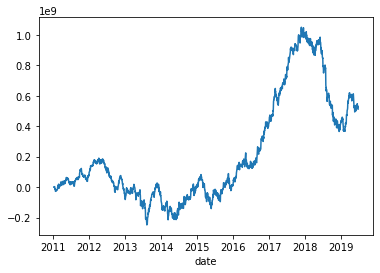

                xsmom-skew!ema-commod_mkts-5-20-1-0.2
sharp_ratio_1y                          -1.675323e+00
sharp_ratio_2y                          -4.750183e-01
sharp_ratio_3y                           5.800277e-01
sharp_ratio_4y                           6.846570e-01
sharp_ratio_5y                           6.769798e-01
sharp_ratio_6y                           5.374787e-01
sharp_ratio_7y                           3.156390e-01
sharp_ratio_8y                           3.306328e-01
sharp_ratio_9y                           3.413947e-01
std_pnl_1y                               1.423826e+07
std_pnl_2y                               1.423487e+07
std_pnl_3y                               1.363954e+07
std_pnl_4y                               1.316270e+07
std_pnl_5y                               1.293369e+07
std_pnl_6y                               1.274705e+07
std_pnl_7y                               1.239083e+07
std_pnl_8y                               1.180677e+07
std_pnl_9y                  

C:\Users\harvey\AppData\Local\Temp/ipykernel_2300/3829181566.py:126: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  xdf[delimiter.join((asset + str(1), data_field))] = dh.EMA(xdf, ma_win, field = ref_field, prefix = asset + str(1) + delimiter)
C:\Users\harvey\AppData\Local\Temp/ipykernel_2300/3829181566.py:151: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  xdf[delimiter.join((asset + str(1), run_mode))] = - xdf[delimiter.join((asset + str(1), data_field))]
C:\Users\harvey\AppData\Local\Temp/ipykernel_2300/3829181566.py:39: Perf

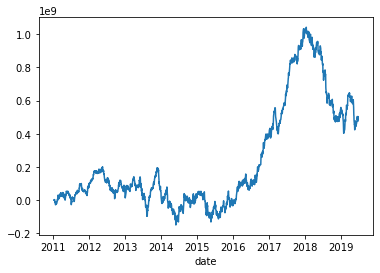

                xsmom-skew!ema-commod_mkts-5-40-1-0.2
sharp_ratio_1y                          -1.708152e+00
sharp_ratio_2y                          -3.803662e-01
sharp_ratio_3y                           6.154495e-01
sharp_ratio_4y                           6.537881e-01
sharp_ratio_5y                           5.940640e-01
sharp_ratio_6y                           3.900262e-01
sharp_ratio_7y                           2.772214e-01
sharp_ratio_8y                           3.280794e-01
sharp_ratio_9y                           3.211706e-01
std_pnl_1y                               1.415524e+07
std_pnl_2y                               1.395557e+07
std_pnl_3y                               1.334558e+07
std_pnl_4y                               1.280958e+07
std_pnl_5y                               1.269245e+07
std_pnl_6y                               1.257886e+07
std_pnl_7y                               1.223471e+07
std_pnl_8y                               1.167573e+07
std_pnl_9y                  

C:\Anaconda3\lib\site-packages\pandas\core\indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
C:\Users\harvey\AppData\Local\Temp/ipykernel_2300/3829181566.py:126: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  xdf[delimiter.join((asset + str(1), data_field))] = dh.EMA(xdf, ma_win, field = ref_field, prefix = asset + str(1) + delimiter)
C:\Users\harvey\AppData\Local\Temp/ipykernel_2300/3829181566.py:151: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many 

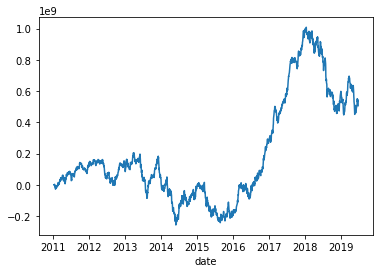

                xsmom-skew!ema-commod_mkts-5-60-1-0.2
sharp_ratio_1y                          -1.522957e+00
sharp_ratio_2y                          -1.403890e-01
sharp_ratio_3y                           9.344199e-01
sharp_ratio_4y                           8.596239e-01
sharp_ratio_5y                           7.172498e-01
sharp_ratio_6y                           4.056470e-01
sharp_ratio_7y                           3.423426e-01
sharp_ratio_8y                           3.017282e-01
sharp_ratio_9y                           3.380496e-01
std_pnl_1y                               1.456995e+07
std_pnl_2y                               1.426602e+07
std_pnl_3y                               1.336644e+07
std_pnl_4y                               1.272961e+07
std_pnl_5y                               1.263554e+07
std_pnl_6y                               1.263557e+07
std_pnl_7y                               1.231590e+07
std_pnl_8y                               1.175991e+07
std_pnl_9y                  

C:\Anaconda3\lib\site-packages\pandas\core\indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
C:\Users\harvey\AppData\Local\Temp/ipykernel_2300/3829181566.py:126: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  xdf[delimiter.join((asset + str(1), data_field))] = dh.EMA(xdf, ma_win, field = ref_field, prefix = asset + str(1) + delimiter)
C:\Users\harvey\AppData\Local\Temp/ipykernel_2300/3829181566.py:151: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many 

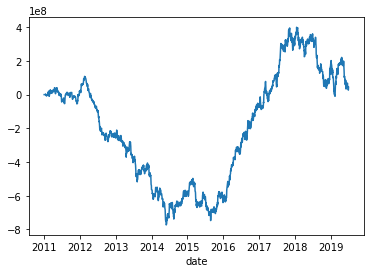

                xsmom-skew!ema-commod_mkts-10-20-1-0.2
sharp_ratio_1y                           -1.375844e+00
sharp_ratio_2y                           -1.339032e-02
sharp_ratio_3y                            5.076292e-01
sharp_ratio_4y                            8.055707e-01
sharp_ratio_5y                            7.470732e-01
sharp_ratio_6y                            3.696012e-01
sharp_ratio_7y                            1.047124e-01
sharp_ratio_8y                            3.520645e-02
sharp_ratio_9y                            2.890255e-02
std_pnl_1y                                1.499721e+07
std_pnl_2y                                1.505651e+07
std_pnl_3y                                1.400113e+07
std_pnl_4y                                1.343921e+07
std_pnl_5y                                1.300957e+07
std_pnl_6y                                1.281803e+07
std_pnl_7y                                1.244959e+07
std_pnl_8y                                1.188929e+07
std_pnl_9y

C:\Users\harvey\AppData\Local\Temp/ipykernel_2300/3829181566.py:126: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  xdf[delimiter.join((asset + str(1), data_field))] = dh.EMA(xdf, ma_win, field = ref_field, prefix = asset + str(1) + delimiter)
C:\Users\harvey\AppData\Local\Temp/ipykernel_2300/3829181566.py:151: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  xdf[delimiter.join((asset + str(1), run_mode))] = - xdf[delimiter.join((asset + str(1), data_field))]
C:\Users\harvey\AppData\Local\Temp/ipykernel_2300/3829181566.py:39: Perf

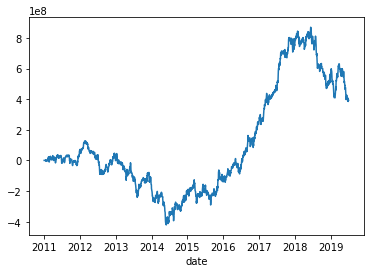

                xsmom-skew!ema-commod_mkts-10-40-1-0.2
sharp_ratio_1y                           -1.834822e+00
sharp_ratio_2y                           -1.329592e-01
sharp_ratio_3y                            6.594737e-01
sharp_ratio_4y                            7.330254e-01
sharp_ratio_5y                            7.673521e-01
sharp_ratio_6y                            4.411256e-01
sharp_ratio_7y                            2.802001e-01
sharp_ratio_8y                            2.500765e-01
sharp_ratio_9y                            2.570645e-01
std_pnl_1y                                1.477021e+07
std_pnl_2y                                1.501104e+07
std_pnl_3y                                1.387903e+07
std_pnl_4y                                1.340866e+07
std_pnl_5y                                1.305324e+07
std_pnl_6y                                1.288639e+07
std_pnl_7y                                1.257981e+07
std_pnl_8y                                1.205085e+07
std_pnl_9y

C:\Users\harvey\AppData\Local\Temp/ipykernel_2300/3829181566.py:126: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  xdf[delimiter.join((asset + str(1), data_field))] = dh.EMA(xdf, ma_win, field = ref_field, prefix = asset + str(1) + delimiter)
C:\Users\harvey\AppData\Local\Temp/ipykernel_2300/3829181566.py:151: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  xdf[delimiter.join((asset + str(1), run_mode))] = - xdf[delimiter.join((asset + str(1), data_field))]
C:\Users\harvey\AppData\Local\Temp/ipykernel_2300/3829181566.py:39: Perf

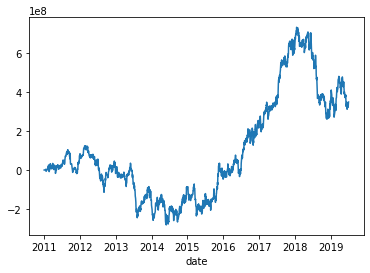

                xsmom-skew!ema-commod_mkts-10-60-1-0.2
sharp_ratio_1y                           -1.100789e+00
sharp_ratio_2y                            2.159515e-02
sharp_ratio_3y                            5.283221e-01
sharp_ratio_4y                            6.454906e-01
sharp_ratio_5y                            5.817722e-01
sharp_ratio_6y                            3.490410e-01
sharp_ratio_7y                            2.344072e-01
sharp_ratio_8y                            2.211401e-01
sharp_ratio_9y                            2.291056e-01
std_pnl_1y                                1.502992e+07
std_pnl_2y                                1.518830e+07
std_pnl_3y                                1.407884e+07
std_pnl_4y                                1.352434e+07
std_pnl_5y                                1.307660e+07
std_pnl_6y                                1.293486e+07
std_pnl_7y                                1.251086e+07
std_pnl_8y                                1.199165e+07
std_pnl_9y

C:\Users\harvey\AppData\Local\Temp/ipykernel_2300/3829181566.py:126: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  xdf[delimiter.join((asset + str(1), data_field))] = dh.EMA(xdf, ma_win, field = ref_field, prefix = asset + str(1) + delimiter)
C:\Users\harvey\AppData\Local\Temp/ipykernel_2300/3829181566.py:151: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  xdf[delimiter.join((asset + str(1), run_mode))] = - xdf[delimiter.join((asset + str(1), data_field))]
C:\Users\harvey\AppData\Local\Temp/ipykernel_2300/3829181566.py:39: Perf

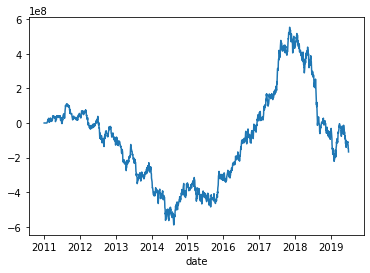

                xsmom-skew!ema-commod_mkts-20-20-1-0.2
sharp_ratio_1y                           -1.993891e+00
sharp_ratio_2y                           -7.376532e-01
sharp_ratio_3y                           -4.211536e-02
sharp_ratio_4y                            3.010640e-01
sharp_ratio_5y                            3.576863e-01
sharp_ratio_6y                            2.637383e-02
sharp_ratio_7y                           -1.282281e-01
sharp_ratio_8y                           -1.280049e-01
sharp_ratio_9y                           -1.056020e-01
std_pnl_1y                                1.519227e+07
std_pnl_2y                                1.574391e+07
std_pnl_3y                                1.470568e+07
std_pnl_4y                                1.395478e+07
std_pnl_5y                                1.368138e+07
std_pnl_6y                                1.343226e+07
std_pnl_7y                                1.309595e+07
std_pnl_8y                                1.249490e+07
std_pnl_9y

C:\Users\harvey\AppData\Local\Temp/ipykernel_2300/3829181566.py:126: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  xdf[delimiter.join((asset + str(1), data_field))] = dh.EMA(xdf, ma_win, field = ref_field, prefix = asset + str(1) + delimiter)
C:\Users\harvey\AppData\Local\Temp/ipykernel_2300/3829181566.py:151: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  xdf[delimiter.join((asset + str(1), run_mode))] = - xdf[delimiter.join((asset + str(1), data_field))]
C:\Users\harvey\AppData\Local\Temp/ipykernel_2300/3829181566.py:39: Perf

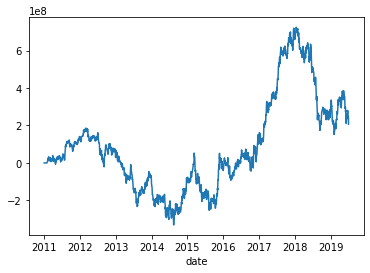

                xsmom-skew!ema-commod_mkts-20-40-1-0.2
sharp_ratio_1y                           -1.296818e+00
sharp_ratio_2y                           -3.498178e-01
sharp_ratio_3y                            2.630236e-01
sharp_ratio_4y                            4.283177e-01
sharp_ratio_5y                            4.303961e-01
sharp_ratio_6y                            2.639523e-01
sharp_ratio_7y                            4.945536e-02
sharp_ratio_8y                            1.201487e-01
sharp_ratio_9y                            1.295883e-01
std_pnl_1y                                1.530566e+07
std_pnl_2y                                1.533237e+07
std_pnl_3y                                1.471026e+07
std_pnl_4y                                1.418412e+07
std_pnl_5y                                1.399152e+07
std_pnl_6y                                1.361287e+07
std_pnl_7y                                1.322824e+07
std_pnl_8y                                1.257623e+07
std_pnl_9y

C:\Users\harvey\AppData\Local\Temp/ipykernel_2300/3829181566.py:126: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  xdf[delimiter.join((asset + str(1), data_field))] = dh.EMA(xdf, ma_win, field = ref_field, prefix = asset + str(1) + delimiter)
C:\Users\harvey\AppData\Local\Temp/ipykernel_2300/3829181566.py:151: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  xdf[delimiter.join((asset + str(1), run_mode))] = - xdf[delimiter.join((asset + str(1), data_field))]
C:\Users\harvey\AppData\Local\Temp/ipykernel_2300/3829181566.py:39: Perf

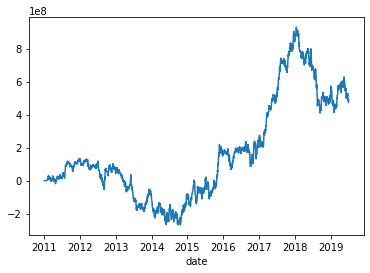

                xsmom-skew!ema-commod_mkts-20-60-1-0.2
sharp_ratio_1y                           -9.236598e-01
sharp_ratio_2y                           -6.659407e-02
sharp_ratio_3y                            4.392997e-01
sharp_ratio_4y                            5.992960e-01
sharp_ratio_5y                            6.437424e-01
sharp_ratio_6y                            4.589290e-01
sharp_ratio_7y                            2.703096e-01
sharp_ratio_8y                            2.972605e-01
sharp_ratio_9y                            2.991948e-01
std_pnl_1y                                1.502953e+07
std_pnl_2y                                1.512227e+07
std_pnl_3y                                1.464787e+07
std_pnl_4y                                1.400692e+07
std_pnl_5y                                1.378978e+07
std_pnl_6y                                1.346480e+07
std_pnl_7y                                1.309616e+07
std_pnl_8y                                1.246892e+07
std_pnl_9y

C:\Users\harvey\AppData\Local\Temp/ipykernel_2300/3829181566.py:126: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  xdf[delimiter.join((asset + str(1), data_field))] = dh.EMA(xdf, ma_win, field = ref_field, prefix = asset + str(1) + delimiter)
C:\Users\harvey\AppData\Local\Temp/ipykernel_2300/3829181566.py:151: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  xdf[delimiter.join((asset + str(1), run_mode))] = - xdf[delimiter.join((asset + str(1), data_field))]
C:\Users\harvey\AppData\Local\Temp/ipykernel_2300/3829181566.py:39: Perf

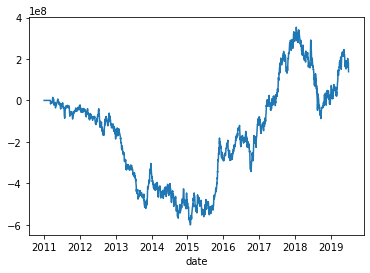

                xsmom-skew!ema-commod_mkts-40-20-1-0.2
sharp_ratio_1y                           -1.613826e-01
sharp_ratio_2y                            2.610735e-01
sharp_ratio_3y                            5.293934e-01
sharp_ratio_4y                            8.156870e-01
sharp_ratio_5y                            5.389833e-01
sharp_ratio_6y                            3.997315e-01
sharp_ratio_7y                            1.643166e-01
sharp_ratio_8y                            1.054838e-01
sharp_ratio_9y                            8.832092e-02
std_pnl_1y                                1.450203e+07
std_pnl_2y                                1.463016e+07
std_pnl_3y                                1.420011e+07
std_pnl_4y                                1.375640e+07
std_pnl_5y                                1.371803e+07
std_pnl_6y                                1.334918e+07
std_pnl_7y                                1.298811e+07
std_pnl_8y                                1.238382e+07
std_pnl_9y

C:\Users\harvey\AppData\Local\Temp/ipykernel_2300/3829181566.py:126: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  xdf[delimiter.join((asset + str(1), data_field))] = dh.EMA(xdf, ma_win, field = ref_field, prefix = asset + str(1) + delimiter)
C:\Users\harvey\AppData\Local\Temp/ipykernel_2300/3829181566.py:151: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  xdf[delimiter.join((asset + str(1), run_mode))] = - xdf[delimiter.join((asset + str(1), data_field))]
C:\Users\harvey\AppData\Local\Temp/ipykernel_2300/3829181566.py:39: Perf

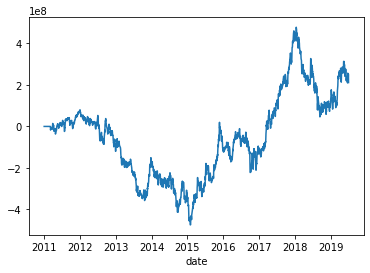

                xsmom-skew!ema-commod_mkts-40-40-1-0.2
sharp_ratio_1y                           -2.440151e-01
sharp_ratio_2y                            2.311204e-01
sharp_ratio_3y                            4.564412e-01
sharp_ratio_4y                            5.845099e-01
sharp_ratio_5y                            4.500482e-01
sharp_ratio_6y                            3.639224e-01
sharp_ratio_7y                            1.402395e-01
sharp_ratio_8y                            1.346015e-01
sharp_ratio_9y                            1.361650e-01
std_pnl_1y                                1.436134e+07
std_pnl_2y                                1.448927e+07
std_pnl_3y                                1.415818e+07
std_pnl_4y                                1.370795e+07
std_pnl_5y                                1.358000e+07
std_pnl_6y                                1.323252e+07
std_pnl_7y                                1.288730e+07
std_pnl_8y                                1.227280e+07
std_pnl_9y

C:\Users\harvey\AppData\Local\Temp/ipykernel_2300/3829181566.py:126: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  xdf[delimiter.join((asset + str(1), data_field))] = dh.EMA(xdf, ma_win, field = ref_field, prefix = asset + str(1) + delimiter)
C:\Users\harvey\AppData\Local\Temp/ipykernel_2300/3829181566.py:151: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  xdf[delimiter.join((asset + str(1), run_mode))] = - xdf[delimiter.join((asset + str(1), data_field))]
C:\Users\harvey\AppData\Local\Temp/ipykernel_2300/3829181566.py:39: Perf

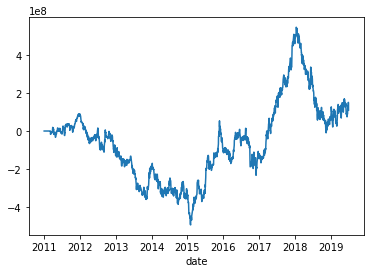

                xsmom-skew!ema-commod_mkts-40-60-1-0.2
sharp_ratio_1y                           -5.219886e-01
sharp_ratio_2y                           -9.706705e-02
sharp_ratio_3y                            2.588589e-01
sharp_ratio_4y                            4.862505e-01
sharp_ratio_5y                            3.683392e-01
sharp_ratio_6y                            2.629770e-01
sharp_ratio_7y                            9.204999e-02
sharp_ratio_8y                            7.922865e-02
sharp_ratio_9y                            6.960058e-02
std_pnl_1y                                1.531135e+07
std_pnl_2y                                1.511131e+07
std_pnl_3y                                1.473613e+07
std_pnl_4y                                1.414388e+07
std_pnl_5y                                1.379863e+07
std_pnl_6y                                1.345797e+07
std_pnl_7y                                1.306076e+07
std_pnl_8y                                1.244149e+07
std_pnl_9y

C:\Users\harvey\AppData\Local\Temp/ipykernel_2300/3829181566.py:126: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  xdf[delimiter.join((asset + str(1), data_field))] = dh.EMA(xdf, ma_win, field = ref_field, prefix = asset + str(1) + delimiter)
C:\Users\harvey\AppData\Local\Temp/ipykernel_2300/3829181566.py:151: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  xdf[delimiter.join((asset + str(1), run_mode))] = - xdf[delimiter.join((asset + str(1), data_field))]
C:\Users\harvey\AppData\Local\Temp/ipykernel_2300/3829181566.py:39: Perf

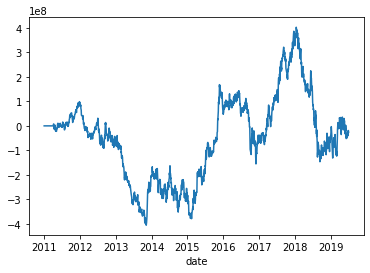

                xsmom-skew!ema-commod_mkts-60-20-1-0.2
sharp_ratio_1y                           -5.227260e-01
sharp_ratio_2y                           -3.047447e-01
sharp_ratio_3y                           -1.099664e-01
sharp_ratio_4y                            1.872786e-01
sharp_ratio_5y                            1.876665e-01
sharp_ratio_6y                            2.386782e-01
sharp_ratio_7y                           -2.155269e-02
sharp_ratio_8y                           -1.518371e-02
sharp_ratio_9y                           -1.709440e-02
std_pnl_1y                                1.556635e+07
std_pnl_2y                                1.499448e+07
std_pnl_3y                                1.424031e+07
std_pnl_4y                                1.354689e+07
std_pnl_5y                                1.339365e+07
std_pnl_6y                                1.319005e+07
std_pnl_7y                                1.279767e+07
std_pnl_8y                                1.214643e+07
std_pnl_9y

C:\Users\harvey\AppData\Local\Temp/ipykernel_2300/3829181566.py:126: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  xdf[delimiter.join((asset + str(1), data_field))] = dh.EMA(xdf, ma_win, field = ref_field, prefix = asset + str(1) + delimiter)
C:\Users\harvey\AppData\Local\Temp/ipykernel_2300/3829181566.py:151: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  xdf[delimiter.join((asset + str(1), run_mode))] = - xdf[delimiter.join((asset + str(1), data_field))]
C:\Users\harvey\AppData\Local\Temp/ipykernel_2300/3829181566.py:39: Perf

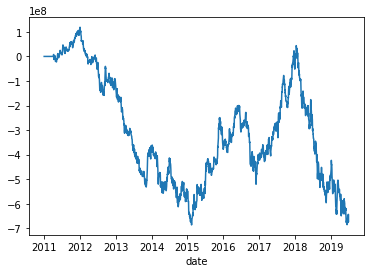

                xsmom-skew!ema-commod_mkts-60-40-1-0.2
sharp_ratio_1y                           -1.499667e+00
sharp_ratio_2y                           -7.949754e-01
sharp_ratio_3y                           -5.457274e-01
sharp_ratio_4y                           -1.483975e-01
sharp_ratio_5y                           -2.081846e-01
sharp_ratio_6y                           -2.390475e-01
sharp_ratio_7y                           -4.452118e-01
sharp_ratio_8y                           -4.521597e-01
sharp_ratio_9y                           -4.315939e-01
std_pnl_1y                                1.602403e+07
std_pnl_2y                                1.540620e+07
std_pnl_3y                                1.453848e+07
std_pnl_4y                                1.392453e+07
std_pnl_5y                                1.365717e+07
std_pnl_6y                                1.337183e+07
std_pnl_7y                                1.297384e+07
std_pnl_8y                                1.231821e+07
std_pnl_9y

C:\Users\harvey\AppData\Local\Temp/ipykernel_2300/3829181566.py:126: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  xdf[delimiter.join((asset + str(1), data_field))] = dh.EMA(xdf, ma_win, field = ref_field, prefix = asset + str(1) + delimiter)
C:\Users\harvey\AppData\Local\Temp/ipykernel_2300/3829181566.py:151: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  xdf[delimiter.join((asset + str(1), run_mode))] = - xdf[delimiter.join((asset + str(1), data_field))]
C:\Users\harvey\AppData\Local\Temp/ipykernel_2300/3829181566.py:39: Perf

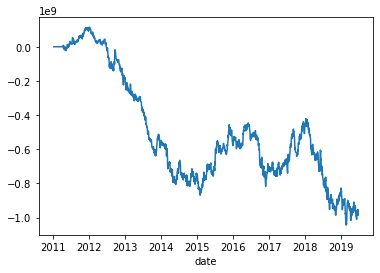

                xsmom-skew!ema-commod_mkts-60-60-1-0.2
sharp_ratio_1y                           -9.644999e-01
sharp_ratio_2y                           -6.418772e-01
sharp_ratio_3y                           -6.437903e-01
sharp_ratio_4y                           -3.159837e-01
sharp_ratio_5y                           -2.538551e-01
sharp_ratio_6y                           -4.864939e-01
sharp_ratio_7y                           -6.807728e-01
sharp_ratio_8y                           -6.562706e-01
sharp_ratio_9y                           -6.248724e-01
std_pnl_1y                                1.579529e+07
std_pnl_2y                                1.550881e+07
std_pnl_3y                                1.473064e+07
std_pnl_4y                                1.409026e+07
std_pnl_5y                                1.379279e+07
std_pnl_6y                                1.357608e+07
std_pnl_7y                                1.316750e+07
std_pnl_8y                                1.246370e+07
std_pnl_9y

C:\Users\harvey\AppData\Local\Temp/ipykernel_2300/3829181566.py:126: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  xdf[delimiter.join((asset + str(1), data_field))] = dh.EMA(xdf, ma_win, field = ref_field, prefix = asset + str(1) + delimiter)
C:\Users\harvey\AppData\Local\Temp/ipykernel_2300/3829181566.py:151: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  xdf[delimiter.join((asset + str(1), run_mode))] = - xdf[delimiter.join((asset + str(1), data_field))]
C:\Users\harvey\AppData\Local\Temp/ipykernel_2300/3829181566.py:39: Perf

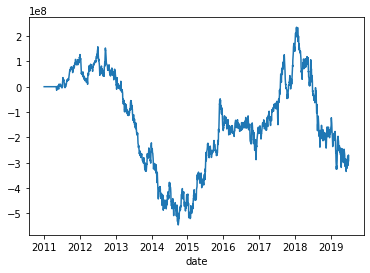

                xsmom-skew!ema-commod_mkts-80-20-1-0.2
sharp_ratio_1y                           -1.108254e+00
sharp_ratio_2y                           -4.415334e-01
sharp_ratio_3y                           -1.876284e-01
sharp_ratio_4y                            8.252786e-02
sharp_ratio_5y                            1.224122e-01
sharp_ratio_6y                           -1.359063e-01
sharp_ratio_7y                           -3.069064e-01
sharp_ratio_8y                           -1.961172e-01
sharp_ratio_9y                           -1.906962e-01
std_pnl_1y                                1.590839e+07
std_pnl_2y                                1.526491e+07
std_pnl_3y                                1.413212e+07
std_pnl_4y                                1.343697e+07
std_pnl_5y                                1.330794e+07
std_pnl_6y                                1.314388e+07
std_pnl_7y                                1.272855e+07
std_pnl_8y                                1.212341e+07
std_pnl_9y

C:\Users\harvey\AppData\Local\Temp/ipykernel_2300/3829181566.py:126: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  xdf[delimiter.join((asset + str(1), data_field))] = dh.EMA(xdf, ma_win, field = ref_field, prefix = asset + str(1) + delimiter)
C:\Users\harvey\AppData\Local\Temp/ipykernel_2300/3829181566.py:151: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  xdf[delimiter.join((asset + str(1), run_mode))] = - xdf[delimiter.join((asset + str(1), data_field))]
C:\Users\harvey\AppData\Local\Temp/ipykernel_2300/3829181566.py:39: Perf

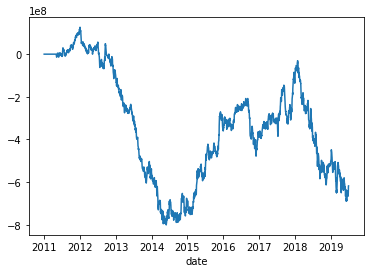

                xsmom-skew!ema-commod_mkts-80-40-1-0.2
sharp_ratio_1y                           -9.247647e-01
sharp_ratio_2y                           -6.252277e-01
sharp_ratio_3y                           -5.544568e-01
sharp_ratio_4y                           -6.047040e-02
sharp_ratio_5y                            1.234853e-01
sharp_ratio_6y                           -2.546402e-01
sharp_ratio_7y                           -4.754409e-01
sharp_ratio_8y                           -4.076035e-01
sharp_ratio_9y                           -3.998860e-01
std_pnl_1y                                1.593978e+07
std_pnl_2y                                1.547081e+07
std_pnl_3y                                1.433669e+07
std_pnl_4y                                1.365644e+07
std_pnl_5y                                1.343283e+07
std_pnl_6y                                1.330107e+07
std_pnl_7y                                1.287790e+07
std_pnl_8y                                1.223996e+07
std_pnl_9y

C:\Users\harvey\AppData\Local\Temp/ipykernel_2300/3829181566.py:126: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  xdf[delimiter.join((asset + str(1), data_field))] = dh.EMA(xdf, ma_win, field = ref_field, prefix = asset + str(1) + delimiter)
C:\Users\harvey\AppData\Local\Temp/ipykernel_2300/3829181566.py:151: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  xdf[delimiter.join((asset + str(1), run_mode))] = - xdf[delimiter.join((asset + str(1), data_field))]
C:\Users\harvey\AppData\Local\Temp/ipykernel_2300/3829181566.py:39: Perf

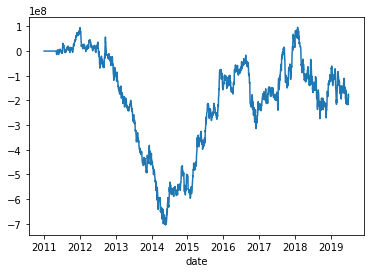

                xsmom-skew!ema-commod_mkts-80-60-1-0.2
sharp_ratio_1y                           -1.271849e-01
sharp_ratio_2y                           -6.540522e-03
sharp_ratio_3y                           -1.872566e-01
sharp_ratio_4y                            2.077078e-01
sharp_ratio_5y                            4.063936e-01
sharp_ratio_6y                            7.497653e-02
sharp_ratio_7y                           -1.492565e-01
sharp_ratio_8y                           -1.221250e-01
sharp_ratio_9y                           -1.216343e-01
std_pnl_1y                                1.580771e+07
std_pnl_2y                                1.537564e+07
std_pnl_3y                                1.438352e+07
std_pnl_4y                                1.365887e+07
std_pnl_5y                                1.341319e+07
std_pnl_6y                                1.336461e+07
std_pnl_7y                                1.293026e+07
std_pnl_8y                                1.229248e+07
std_pnl_9y

C:\Users\harvey\AppData\Local\Temp/ipykernel_2300/3829181566.py:126: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  xdf[delimiter.join((asset + str(1), data_field))] = dh.EMA(xdf, ma_win, field = ref_field, prefix = asset + str(1) + delimiter)
C:\Users\harvey\AppData\Local\Temp/ipykernel_2300/3829181566.py:151: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  xdf[delimiter.join((asset + str(1), run_mode))] = - xdf[delimiter.join((asset + str(1), data_field))]
C:\Users\harvey\AppData\Local\Temp/ipykernel_2300/3829181566.py:39: Perf

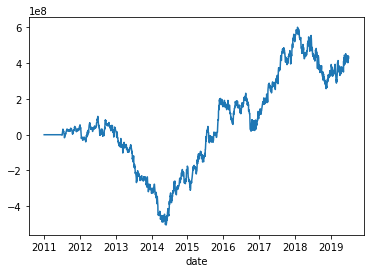

                xsmom-skew!ema-commod_mkts-120-20-1-0.2
sharp_ratio_1y                            -9.073476e-02
sharp_ratio_2y                             2.828985e-01
sharp_ratio_3y                             4.835290e-01
sharp_ratio_4y                             6.621681e-01
sharp_ratio_5y                             8.692443e-01
sharp_ratio_6y                             4.877907e-01
sharp_ratio_7y                             2.623191e-01
sharp_ratio_8y                             2.977815e-01
sharp_ratio_9y                             2.892814e-01
std_pnl_1y                                 1.474400e+07
std_pnl_2y                                 1.415181e+07
std_pnl_3y                                 1.364552e+07
std_pnl_4y                                 1.314529e+07
std_pnl_5y                                 1.283461e+07
std_pnl_6y                                 1.275263e+07
std_pnl_7y                                 1.232938e+07
std_pnl_8y                                 1.174

C:\Users\harvey\AppData\Local\Temp/ipykernel_2300/3829181566.py:126: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  xdf[delimiter.join((asset + str(1), data_field))] = dh.EMA(xdf, ma_win, field = ref_field, prefix = asset + str(1) + delimiter)
C:\Users\harvey\AppData\Local\Temp/ipykernel_2300/3829181566.py:151: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  xdf[delimiter.join((asset + str(1), run_mode))] = - xdf[delimiter.join((asset + str(1), data_field))]
C:\Users\harvey\AppData\Local\Temp/ipykernel_2300/3829181566.py:39: Perf

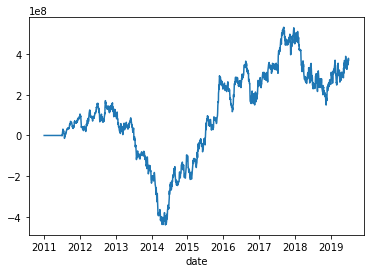

                xsmom-skew!ema-commod_mkts-120-40-1-0.2
sharp_ratio_1y                             5.345205e-01
sharp_ratio_2y                             8.920969e-02
sharp_ratio_3y                             2.030316e-01
sharp_ratio_4y                             4.880002e-01
sharp_ratio_5y                             7.046268e-01
sharp_ratio_6y                             2.930527e-01
sharp_ratio_7y                             1.644526e-01
sharp_ratio_8y                             2.549493e-01
sharp_ratio_9y                             2.476725e-01
std_pnl_1y                                 1.507030e+07
std_pnl_2y                                 1.448850e+07
std_pnl_3y                                 1.376904e+07
std_pnl_4y                                 1.322393e+07
std_pnl_5y                                 1.289562e+07
std_pnl_6y                                 1.288407e+07
std_pnl_7y                                 1.243447e+07
std_pnl_8y                                 1.184

C:\Users\harvey\AppData\Local\Temp/ipykernel_2300/3829181566.py:126: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  xdf[delimiter.join((asset + str(1), data_field))] = dh.EMA(xdf, ma_win, field = ref_field, prefix = asset + str(1) + delimiter)
C:\Users\harvey\AppData\Local\Temp/ipykernel_2300/3829181566.py:151: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  xdf[delimiter.join((asset + str(1), run_mode))] = - xdf[delimiter.join((asset + str(1), data_field))]
C:\Users\harvey\AppData\Local\Temp/ipykernel_2300/3829181566.py:39: Perf

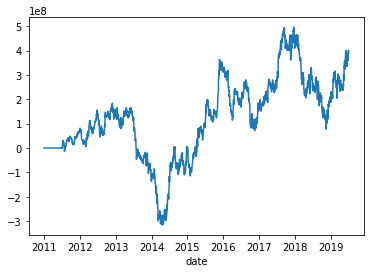

                xsmom-skew!ema-commod_mkts-120-60-1-0.2
sharp_ratio_1y                             6.159199e-01
sharp_ratio_2y                             2.887330e-01
sharp_ratio_3y                             3.391025e-01
sharp_ratio_4y                             3.705206e-01
sharp_ratio_5y                             5.663943e-01
sharp_ratio_6y                             2.335348e-01
sharp_ratio_7y                             1.820310e-01
sharp_ratio_8y                             2.700928e-01
sharp_ratio_9y                             2.623835e-01
std_pnl_1y                                 1.526805e+07
std_pnl_2y                                 1.451150e+07
std_pnl_3y                                 1.371410e+07
std_pnl_4y                                 1.316833e+07
std_pnl_5y                                 1.290938e+07
std_pnl_6y                                 1.287424e+07
std_pnl_7y                                 1.242646e+07
std_pnl_8y                                 1.182

C:\Users\harvey\AppData\Local\Temp/ipykernel_2300/3829181566.py:126: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  xdf[delimiter.join((asset + str(1), data_field))] = dh.EMA(xdf, ma_win, field = ref_field, prefix = asset + str(1) + delimiter)
C:\Users\harvey\AppData\Local\Temp/ipykernel_2300/3829181566.py:151: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  xdf[delimiter.join((asset + str(1), run_mode))] = - xdf[delimiter.join((asset + str(1), data_field))]
C:\Users\harvey\AppData\Local\Temp/ipykernel_2300/3829181566.py:39: Perf

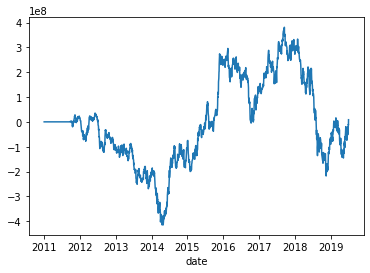

                xsmom-skew!ema-commod_mkts-180-20-1-0.2
sharp_ratio_1y                            -5.031366e-01
sharp_ratio_2y                            -3.901159e-01
sharp_ratio_3y                            -2.308024e-01
sharp_ratio_4y                             3.088282e-02
sharp_ratio_5y                             2.735588e-01
sharp_ratio_6y                             1.362901e-01
sharp_ratio_7y                            -1.901261e-03
sharp_ratio_8y                             6.155366e-03
sharp_ratio_9y                             5.979721e-03
std_pnl_1y                                 1.484397e+07
std_pnl_2y                                 1.408612e+07
std_pnl_3y                                 1.348184e+07
std_pnl_4y                                 1.303713e+07
std_pnl_5y                                 1.267070e+07
std_pnl_6y                                 1.254535e+07
std_pnl_7y                                 1.206213e+07
std_pnl_8y                                 1.143

C:\Users\harvey\AppData\Local\Temp/ipykernel_2300/3829181566.py:126: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  xdf[delimiter.join((asset + str(1), data_field))] = dh.EMA(xdf, ma_win, field = ref_field, prefix = asset + str(1) + delimiter)
C:\Users\harvey\AppData\Local\Temp/ipykernel_2300/3829181566.py:151: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  xdf[delimiter.join((asset + str(1), run_mode))] = - xdf[delimiter.join((asset + str(1), data_field))]
C:\Users\harvey\AppData\Local\Temp/ipykernel_2300/3829181566.py:39: Perf

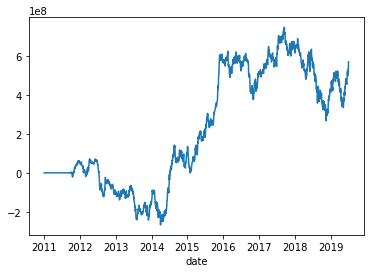

                xsmom-skew!ema-commod_mkts-180-40-1-0.2
sharp_ratio_1y                             1.183083e-01
sharp_ratio_2y                             9.221413e-03
sharp_ratio_3y                             5.612345e-02
sharp_ratio_4y                             4.531573e-01
sharp_ratio_5y                             6.630689e-01
sharp_ratio_6y                             5.925805e-01
sharp_ratio_7y                             4.027950e-01
sharp_ratio_8y                             4.106555e-01
sharp_ratio_9y                             3.989299e-01
std_pnl_1y                                 1.489153e+07
std_pnl_2y                                 1.401054e+07
std_pnl_3y                                 1.328990e+07
std_pnl_4y                                 1.295764e+07
std_pnl_5y                                 1.258754e+07
std_pnl_6y                                 1.246380e+07
std_pnl_7y                                 1.198828e+07
std_pnl_8y                                 1.135

C:\Users\harvey\AppData\Local\Temp/ipykernel_2300/3829181566.py:126: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  xdf[delimiter.join((asset + str(1), data_field))] = dh.EMA(xdf, ma_win, field = ref_field, prefix = asset + str(1) + delimiter)
C:\Users\harvey\AppData\Local\Temp/ipykernel_2300/3829181566.py:151: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  xdf[delimiter.join((asset + str(1), run_mode))] = - xdf[delimiter.join((asset + str(1), data_field))]
C:\Users\harvey\AppData\Local\Temp/ipykernel_2300/3829181566.py:39: Perf

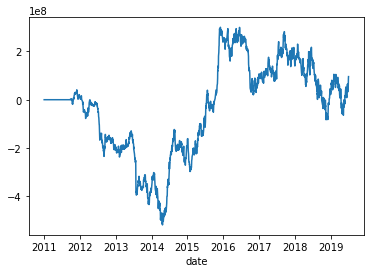

                xsmom-skew!ema-commod_mkts-180-60-1-0.2
sharp_ratio_1y                            -1.996007e-01
sharp_ratio_2y                            -1.951992e-02
sharp_ratio_3y                            -2.258633e-01
sharp_ratio_4y                             2.229524e-01
sharp_ratio_5y                             4.290804e-01
sharp_ratio_6y                             2.356008e-01
sharp_ratio_7y                             9.349727e-02
sharp_ratio_8y                             6.786875e-02
sharp_ratio_9y                             6.593207e-02
std_pnl_1y                                 1.457098e+07
std_pnl_2y                                 1.416331e+07
std_pnl_3y                                 1.332255e+07
std_pnl_4y                                 1.299212e+07
std_pnl_5y                                 1.261413e+07
std_pnl_6y                                 1.266264e+07
std_pnl_7y                                 1.215568e+07
std_pnl_8y                                 1.150

C:\Users\harvey\AppData\Local\Temp/ipykernel_2300/3829181566.py:126: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  xdf[delimiter.join((asset + str(1), data_field))] = dh.EMA(xdf, ma_win, field = ref_field, prefix = asset + str(1) + delimiter)
C:\Users\harvey\AppData\Local\Temp/ipykernel_2300/3829181566.py:151: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  xdf[delimiter.join((asset + str(1), run_mode))] = - xdf[delimiter.join((asset + str(1), data_field))]
C:\Users\harvey\AppData\Local\Temp/ipykernel_2300/3829181566.py:39: Perf

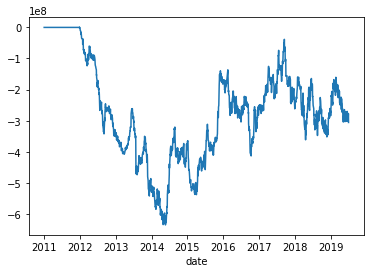

                xsmom-skew!ema-commod_mkts-240-20-1-0.2
sharp_ratio_1y                            -3.865493e-01
sharp_ratio_2y                            -2.549996e-01
sharp_ratio_3y                            -2.961358e-02
sharp_ratio_4y                             1.288259e-01
sharp_ratio_5y                             2.034824e-01
sharp_ratio_6y                            -1.049367e-02
sharp_ratio_7y                            -9.170447e-02
sharp_ratio_8y                            -2.238002e-01
sharp_ratio_9y                            -2.174128e-01
std_pnl_1y                                 1.397727e+07
std_pnl_2y                                 1.414274e+07
std_pnl_3y                                 1.342365e+07
std_pnl_4y                                 1.287267e+07
std_pnl_5y                                 1.242577e+07
std_pnl_6y                                 1.233289e+07
std_pnl_7y                                 1.176945e+07
std_pnl_8y                                 1.115

C:\Users\harvey\AppData\Local\Temp/ipykernel_2300/3829181566.py:126: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  xdf[delimiter.join((asset + str(1), data_field))] = dh.EMA(xdf, ma_win, field = ref_field, prefix = asset + str(1) + delimiter)
C:\Users\harvey\AppData\Local\Temp/ipykernel_2300/3829181566.py:151: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  xdf[delimiter.join((asset + str(1), run_mode))] = - xdf[delimiter.join((asset + str(1), data_field))]
C:\Users\harvey\AppData\Local\Temp/ipykernel_2300/3829181566.py:39: Perf

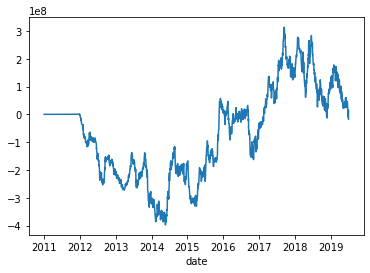

                xsmom-skew!ema-commod_mkts-240-40-1-0.2
sharp_ratio_1y                            -1.092522e+00
sharp_ratio_2y                            -2.089116e-01
sharp_ratio_3y                            -9.849324e-03
sharp_ratio_4y                             2.195894e-01
sharp_ratio_5y                             2.682261e-01
sharp_ratio_6y                             1.444672e-01
sharp_ratio_7y                             1.148979e-01
sharp_ratio_8y                            -1.306504e-02
sharp_ratio_9y                            -1.269222e-02
std_pnl_1y                                 1.379995e+07
std_pnl_2y                                 1.417234e+07
std_pnl_3y                                 1.345792e+07
std_pnl_4y                                 1.285611e+07
std_pnl_5y                                 1.239290e+07
std_pnl_6y                                 1.212653e+07
std_pnl_7y                                 1.156016e+07
std_pnl_8y                                 1.094

C:\Users\harvey\AppData\Local\Temp/ipykernel_2300/3829181566.py:126: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  xdf[delimiter.join((asset + str(1), data_field))] = dh.EMA(xdf, ma_win, field = ref_field, prefix = asset + str(1) + delimiter)
C:\Users\harvey\AppData\Local\Temp/ipykernel_2300/3829181566.py:151: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  xdf[delimiter.join((asset + str(1), run_mode))] = - xdf[delimiter.join((asset + str(1), data_field))]
C:\Users\harvey\AppData\Local\Temp/ipykernel_2300/3829181566.py:39: Perf

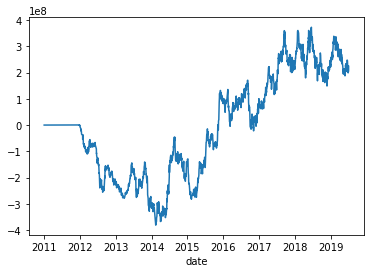

                xsmom-skew!ema-commod_mkts-240-60-1-0.2
sharp_ratio_1y                            -3.992271e-01
sharp_ratio_2y                             1.266231e-01
sharp_ratio_3y                             1.979246e-01
sharp_ratio_4y                             4.292883e-01
sharp_ratio_5y                             4.536978e-01
sharp_ratio_6y                             3.452664e-01
sharp_ratio_7y                             2.806272e-01
sharp_ratio_8y                             1.525434e-01
sharp_ratio_9y                             1.481902e-01
std_pnl_1y                                 1.354415e+07
std_pnl_2y                                 1.401246e+07
std_pnl_3y                                 1.342818e+07
std_pnl_4y                                 1.283555e+07
std_pnl_5y                                 1.239822e+07
std_pnl_6y                                 1.218748e+07
std_pnl_7y                                 1.164008e+07
std_pnl_8y                                 1.101

In [45]:
res = {}
stats_list = []
cum_list = []
sratio_years = [int(ten[:-1]) for ten in pnl_tenors]
rev_char = '!'

metal_mixed_mkts = ['rb', 'hc', 'i', 'j', 'jm', 'ru', 'FG', 'ZC', 'cu', 'al', 'zn', 'ni']
petro_mixed_mkts = ['l', 'pp', 'v', 'TA', 'MA', 'bu', 'sc']
ags_mixed_mkts = ['m', 'RM', 'y', 'p', 'OI', 'a', 'c', 'cs', 'CF', 'SR', 'jd']
commod_mkts = ['rb', 'hc', 'i', 'j', 'jm', 'ru', 'FG', 'ZC', 'cu', 'al', 'zn', 'pb', 'sn', \
               'l', 'pp', 'v', 'TA', 'sc', 'm', 'RM', 'y', 'p', 'OI', 'a', 'c', 'CF', 'jd', \
               'AP', 'SM', 'eb', 'eg', 'UR', 'CJ', 'pg', 'SR', 'ni', 'fu', 'lu', 'cs', \
               'bu', 'SF', 'MA', 'SA', 'sp', 'nr']
commod_mkts_p1 = ['rb', 'hc', 'i', 'j', 'jm', 'ru', 'FG', 'ZC', 'cu', 'al', 'zn', 'pb', 'sn', \
               'l', 'pp', 'v', 'TA', 'sc', 'm', 'RM', 'y', 'p', 'OI', 'a', 'c', 'CF', 'jd', \
               'AP', 'SM']
               ## 'au', 'ag', 'b']
commod_mkts_p2 = ['rb', 'hc', 'i', 'j', 'jm', 'ru', 'FG', 'ZC', 'cu', 'al', 'zn', 'pb', 'sn', \
               'l', 'pp', 'v', 'TA', 'sc', 'm', 'RM', 'y', 'p', 'OI', 'a', 'c', 'CF', 'jd', \
               'AP', 'SM', 'eb', 'eg', 'UR', 'CJ', 'ss', 'pg']

product_list = commod_mkts # metal_mixed_mkts # +  petro_mixed_mkts #  
product_name = 'commod_mkts'

sim_name = 'tsmom'
run_mode = 'skew'

start_date = datetime.date(2011,1,1)
end_date = datetime.date(2019,6,30)
quantile = 0.2
cost_ratio = 0.5
pos_std = 1
std_win = 20

win = 16
ma_win = 8
rebal = 5
params = [0.0, 0.0]

exec_field = 'open'
save_loc = "C:\\dev\\data\\selected_%s_" % ('_'.join([sim_name, run_mode, product_name, str(quantile), str(end_date)]))

#curve_list = ['linear', 'semilinear', 'reverting', 'absorbing', 'sigmoid', 'band']
crv_param = 2.0

index_list = [5, 10, 20, 40, 60, 80, 120, 180, 240] # [i for i in range(10, 330, 10)]  # [1, 2, 3, 4, 5, 10, 15, 20, 25, 30] # [1, 3, 5, 7, 10, 15, 20] # + range(10, 250, 10) # 
column_list =  [10, 20, 40, 60] #   curve_list #   [1, 2, 3, 4, 5, 10, 15, 20] # range(10, 130, 10) # # [60, 80, 100, 120, 140, 160] #[i * 0.01 for i in range(0, 32, 4)] #

sratio = {}
run_sratio = True

pos_sum = pd.DataFrame()
pos_list = []
scenarios = list(itertools.product(index_list, column_list))

if 'ts' in sim_name:
    sim_func = run_ts_test
elif 'xs' in sim_name:
    sim_func = run_xs_test
if run_sratio:
    for yr in sratio_years:
        sratio[yr] = pd.DataFrame(0, index = index_list, columns = column_list)

port_pnl = pd.Series()
#pos_map = (None, {}, '')
#pos_map = (misc.sign, {}, 'sign')
pos_map = (dh.response_curve, {'param': crv_param, "response": 'reverting'}, 'reverting')

for scen in scenarios:
    scen_x = scen[0]
    scen_y = scen[1]
    if run_mode in ['ryield']:
        win = 1
        ma_win = 1
        rebal = scen_x
        pos_map = (dh.response_curve, {'param': crv_param, "response": scen_y}, scen_y)
        if sim_name == 'xscarry':
            quantile = scen_x * 0.1
    elif run_mode in ['basmom', 'mom', 'clbrk', 'hlbrk', 'ewmac']:
        win = scen_x
        ma_win = 1
        rebal = scen_y
    elif run_mode in ['ewmacdff']:
        win = scen_x
        rebal = scen_y
        params = params
    elif run_mode in ['skew!ema']:
        win = scen_x
        ma_win = scen_y
        rebal = 1
        params = [0.0, 0.0]
    elif run_mode in ['mixmom']:
        win = scen_x
        ma_win = 1
        rebal = scen_y
    elif ('ts' in sim_name) and (run_mode in ['ryieldxma', 'ryieldsma', \
                                              'ryieldnma', 'ryieldnmb', 'ryieldzlv', \
                                              'lrskewsma', 'lrkurtsma', 'trdstrsma',\
                                              'upstdsma', 'volmfratiosma']):
        win = 1
        ma_win = scen_x
        rebal = scen_y
        #pos_map = (dh.response_curve, {'param': crv_param, "response": scen_y}, scen_y)
    elif ('xs' in sim_name) and (run_mode in ['ryieldxma', 'ryieldsma', \
                                              'ryieldnma', 'ryieldnmb', 'ryieldzlv', \
                                              'lrskewsma', 'lrkurtsma', 'trdstrsma',\
                                              'upstdsma', 'volmfratiosma']):
        win = 1
        ma_win = scen_x
        rebal = scen_y    
    elif run_mode in ['basmomxma', 'basmomsma', 'basmomnma', 'basmomnmb', 'basmomzlv', \
                      'momsma', 'momxma', 'momnma', 'momnmb', 'momzlv', 'macdnma']:
        win = scen_x
        ma_win = 120
        rebal = 5
        if run_mode in ['macdnma']:
            params = [scen_y, 80.0/win]
    else:
        print("unsupported run_mode")
        continue

    run_args = {}        
    run_args['run_name'] = run_name = '-'.join([sim_name, run_mode, product_name, str(win), str(ma_win), str(rebal), str(quantile)])
    run_args['cost_ratio'] = cost_ratio
    run_args['exec_field'] = exec_field
    run_args['product_list'] = product_list
    run_args['start_date'] = start_date
    run_args['end_date'] = end_date
    
    run_args['win'] = win
    run_args['ma_win'] = ma_win
    run_args['std_win'] = std_win
    run_args['prefix'] = save_loc        
    run_args['rebal_freq'] = rebal
    run_args['pos_std'] = pos_std
    run_args['params'] = params
    run_args['pos_map'] = pos_map
    run_args['run_mode'] = run_mode
    run_args['quantile'] = quantile
    res = sim_func(run_args)
    res['cum_pnl'].plot()
    plt.show()
    cum_list.append(res['cum_pnl'])
    stats_list.append(res['pnl_stats'])
    vdf = res['pnl_stats']
    vdf = vdf.loc[[idx for idx in vdf.index if ('sharp' in idx) or ('std' in idx)], :]
    print(vdf)
    if run_sratio:
        for yr in sratio_years:
            lbl = 'sharp_ratio_' + str(yr) + 'y'
            sratio[yr][scen_y].loc[scen_x] = res['pnl_stats'][run_name][lbl]

cum_df = pd.concat(cum_list, axis = 1)
cum_df.to_csv(save_loc + 'pnl.csv')
stats_df = pd.concat(stats_list, axis = 1)
stats_df.T.to_csv(save_loc + 'stats.csv')

if run_sratio:
    for yr in sratio_years:
        print(sratio[yr])

In [37]:
#ind_metal_mkts
# scenarios = [('tscarry', 'ryield', 0.33, 1, 1, 5, (misc.sign, {}, 'sign'), [0.0, 0.0]), \
#              ('tscarry', 'basmom', 0.11, 60, 1, 10, (misc.sign, {}, 'sign'), [0.0, 0.0]), \
#              ('tscarry', 'basmom', 0.11, 100, 1, 10, (misc.sign, {}, 'sign'), [0.0, 0.0]), \
#              ('tscarry', 'basmom', 0.11, 240, 1, 10, (misc.sign, {}, 'sign'), [0.0, 0.0]), \
#              ('xscarry', 'ryieldsma', 0.0, 1, 1, 5, (None, {}, ''), [0.0, 0.0]), \
#              ('xscarry', 'ryieldsma', 0.0, 1, 50, 5, (None, {}, ''), [0.0, 0.0]), \
#              ('xscarry', 'basmom', 0.0, 110, 1, 5, (None, {}, ''), [0.0, 0.0]), \
#              ('xscarry', 'basmom', 0.0, 140, 1, 5, (None, {}, ''), [0.0, 0.0]), \
#              ('xscarry', 'basmomsma', 0.0, 90, 20, 5, (None, {}, ''), [0.0, 0.0]), \
#              ('xscarry', 'basmomsma', 0.0, 230, 20, 5, (None, {}, ''), [0.0, 0.0]), \
#              ('tsmom', 'momxma', 0.03, 20, 50, 5, (misc.sign, {}, 'sign'), [0.0, 0.0]), \
#              ('tsmom', 'momxma', 0.03, 30, 120, 5, (misc.sign, {}, 'sign'), [0.0, 0.0]), \
#              ('tsmom', 'momxma', 0.03, 40, 30, 5, (misc.sign, {}, 'sign'), [0.0, 0.0]), \
#              ('tsmom', 'mixmom', 0.03, 10, 1, 10, (misc.sign, {}, 'sign'), [0.0, 0.0]), \
#              ('tsmom', 'mixmom', 0.03, 20, 1, 10, (misc.sign, {}, 'sign'), [0.0, 0.0]), \
#              ('tsmom', 'rsixea', 0.03, 20, 30, 5, (misc.sign, {}, 'sign'), [0.0, 0.0]), \
#              ('tsmom', 'rsixea', 0.03, 40, 30, 5, (misc.sign, {}, 'sign'), [0.0, 0.0]), \
#              ('tsmom', 'rsixea', 0.03, 60, 30, 5, (misc.sign, {}, 'sign'), [0.0, 0.0]), \
#              ('tsmom', 'macdnma', 0.03, 8, 160, 5, (dh.response_curve, {"response": "reverting", "param": 2}, 'reverting'), [1.5, 10.0]), \
#              ('tsmom', 'macdnma', 0.03, 16, 160, 5, (dh.response_curve, {"response": "reverting", "param": 2}, 'reverting'), [1.5, 5.0]), \
#              ('tsmom', 'macdnma', 0.03, 24, 160, 5, (dh.response_curve, {"response": "reverting", "param": 2}, 'reverting'), [1.5, 3.34]), \
#              #('xsmom', 'mom', 0.0, 130, 1, 5, (None, {}, ''), [0.0]), \
#              #('xsmom', 'mom', 0.0, 230, 1, 5, (None, {}, ''), [0.0]), \
#              #('xsmom', 'rsiema', 0.0, 60, 80, 5, (None, {}, ''), [0.0]), \
#              #('xsmom', 'rsiema', 0.0, 10, 80, 5, (None, {}, ''), [0.0]), \
#              #('xsmom', 'rsiema', 0.0, 40, 20, 5, (None, {}, ''), [0.0]), \
#              #('xsmom', 'macdnma', 0.0, 16, 200, 5, (dh.response_curve, {"response": "absorbing", "param": 2}, "absorbing"), [1.5, 6.25], 0.2), \
#              #('xsmom', 'macdnma', 0.0, 40, 200, 5, (dh.response_curve, {"response": "absorbing", "param": 2}, "absorbing"), [1.5, 2.5], 0.2), \
#              #('xsmom', 'macdnma', 0.0, 56, 280, 5, (dh.response_curve, {"response": "absorbing", "param": 2}, "absorbing"), [1.5, 2.5], 0.2), \
#             ] 

#commod_mkts
scenarios_elite = [ \
        ('tscarry', 'ryieldnmb', 2.8, 1, 120, 1, (None, {}, ''), [0.0, 0.0]),
        ('tscarry', 'basmomnma', 0.7, 100, 120, 1, (None, {}, ''), [0.0, 0.0]),
        ('tscarry', 'basmomnma', 0.5, 170, 120, 1, (None, {}, ''), [0.0, 0.0]),
#        #('xscarry', 'ryieldsma', 0.6, 1, 30, 10, (None, {}, ''), [0.0, 0.0], 0.2), 
#        #('xscarry', 'ryieldsma', 1.5, 1, 190, 10, (None, {}, ''), [0.0, 0.0], 0.2),
        ('xscarry', 'ryieldnma',2.0, 1, 20, 1, (None, {}, ''), [0.0, 0.0], 0.2), 
        ('xscarry', 'ryieldnma', 2.2, 1, 110, 1, (None, {}, ''), [0.0, 0.0], 0.2),             
#        #'xscarry', 'basmomsma', 0.6, 100, 10, 5, (None, {}, ''), [0.0, 0.0], 0.2),
#        #'xscarry', 'basmomsma', 0.6, 220, 10, 5, (None, {}, ''), [0.0, 0.0], 0.2),
        ('xscarry', 'basmomnma', 2.5, 80, 120, 5, (None, {}, ''), [0.0, 0.0], 0.2),
        ('xscarry', 'basmomnma', 2.5, 150, 120, 5, (None, {}, ''), [0.0, 0.0], 0.2),
#        #('xscarry', 'basmomnma', 1.5, 220, 120, 5, (None, {}, ''), [0.0, 0.0], 0.2),
#        ('tsmom', 'momnma', 0.2, 10, 60, 1, (None, {}, ''), [0.0]),
#        ('tsmom', 'momnma', 0.07, 220, 60, 1, (None, {}, ''), [0.0]),
        ('tsmom', 'hlbrk', 1.2, 10, 1, 10, (None, {}, ''), [0.0, 0.0], 0.2),
        ('tsmom', 'hlbrk', 1.0, 30, 1, 10, (None, {}, ''), [0.0, 0.0], 0.2),
        ('tsmom', 'hlbrk', 1.0, 240, 1, 10, (None, {}, ''), [0.0, 0.0], 0.2),             
        ('tsmom', 'macdnma', 0.24, 8, 160, 5, (dh.response_curve, {"response": "reverting", "param": 2}, 'reverting'), [1.5, 10.0]),
        ('tsmom', 'macdnma', 0.21, 16, 160, 5, (dh.response_curve, {"response": "reverting", "param": 2}, 'reverting'), [1.5, 5.0]),
#        ('tsmom', 'macdnma', 0.3, 24, 160, 5, (dh.response_curve, {"response": "reverting", "param": 2}, 'reverting'), [1.5, 3.34]),
#        #('xsmom', 'mom', 0.15, 160, 1, 5, (None, {}, ''), [0.0], 0.2),
        ('xsmom', 'hlbrk', 0.9, 20, 1, 10, (None, {}, ''), [0.0, 0.0], 0.2),
        ('xsmom', 'hlbrk', 0.75, 120, 1, 10, (None, {}, ''), [0.0, 0.0], 0.2),
        ('xsmom', 'hlbrk', 0.75, 240, 1, 10, (None, {}, ''), [0.0, 0.0], 0.2),
#        ('xsmom', 'mom', 1.0, 20, 1, 5, (None, {}, ''), [0.0], 0.2),
#        ('xsmom', 'mom', 1.0, 210, 1, 5, (None, {}, ''), [0.0], 0.2),
        ('xsmom', 'momnma', 0.75, 130, 90, 5, (None, {}, ''), [0.0], 0.2),
        ('xsmom', 'momnma', 0.75, 240, 90, 5, (None, {}, ''), [0.0], 0.2),
        #('xsmom', 'momsma', 0.8, 140, 120, 5, (None, {}, ''), [0.0], 0.2),
        #('xsmom', 'momsma', 0.8, 240, 120, 5, (None, {}, ''), [0.0], 0.2),
]

#commod_mkts
scenarios_all = [ \
             ('tscarry', 'ryieldnmb', 2.8, 1, 120, 1, (None, {}, ''), [0.0, 0.0]), \
             ('tscarry', 'basmomnma', 0.7, 100, 120, 1, (None, {}, ''), [0.0, 0.0]), \
             ('tscarry', 'basmomnma', 0.5, 170, 120, 1, (None, {}, ''), [0.0, 0.0]),\
             #('tscarry', 'basmomnma', 0.2, 230, 120, 1, (None, {}, ''), [0.0, 0.0]),\
             ('xscarry', 'ryieldsma', 0.6, 1, 30, 10, (None, {}, ''), [0.0, 0.0], 0.2), \
             #('xscarry', 'ryieldsma', 0.15, 1, 110, 10, (None, {}, ''), [0.0, 0.0], 0.2), \
             ('xscarry', 'ryieldsma', 1.5, 1, 190, 10, (None, {}, ''), [0.0, 0.0], 0.2), \
             ('xscarry', 'ryieldnma',1.5, 1, 20, 1, (None, {}, ''), [0.0, 0.0], 0.2), \
             ('xscarry', 'ryieldnma', 1.8, 1, 110, 1, (None, {}, ''), [0.0, 0.0], 0.2), \
             #('xscarry', 'ryieldnma', 0.2, 1, 210, 1, (None, {}, ''), [0.0, 0.0], 0.2), \
             ('xscarry', 'basmomsma', 0.6, 100, 10, 5, (None, {}, ''), [0.0, 0.0], 0.2), \
             ('xscarry', 'basmomsma', 0.6, 220, 10, 5, (None, {}, ''), [0.0, 0.0], 0.2), \
             ('xscarry', 'basmomnma', 1.5, 80, 120, 5, (None, {}, ''), [0.0, 0.0], 0.2), \
             ('xscarry', 'basmomnma', 1.5, 150, 120, 5, (None, {}, ''), [0.0, 0.0], 0.2), \
             ('xscarry', 'basmomnma', 1.5, 220, 120, 5, (None, {}, ''), [0.0, 0.0], 0.2), \
             ('tsmom', 'momnma', 0.2, 10, 60, 1, (None, {}, ''), [0.0]), \
             ('tsmom', 'momnma', 0.07, 220, 60, 1, (None, {}, ''), [0.0]), \
             ('tsmom', 'hlbrk', 2.0, 10, 1, 10, (None, {}, ''), [0.0, 0.0], 0.2), \
             ('tsmom', 'hlbrk', 1.5, 30, 1, 10, (None, {}, ''), [0.0, 0.0], 0.2), \
             ('tsmom', 'hlbrk', 1.2, 240, 1, 10, (None, {}, ''), [0.0, 0.0], 0.2), \
             #('tsmom', 'momxma', 0.2, 40, 30, 5, (misc.sign, {}, 'sign'), [0.0]), \
             #('tsmom', 'momxma', 0.15, 40, 80, 5, (misc.sign, {}, 'sign'), [0.0]), \
             #('tsmom', 'mixmom', 0.375, 10, 1, 10, (misc.sign, {}, 'sign'), [0.0]), \
             #('tsmom', 'mixmom', 0.3, 30, 1, 10, (misc.sign, {}, 'sign'), [0.0]), \
             #('tsmom', 'mixmom', 0.3, 220, 1, 10, (misc.sign, {}, 'sign'), [0.0]), \
             #('tsmom', 'rsixea', 0.25, 30, 40, 5, (misc.sign, {}, 'sign'), [0.0]), \
             #('tsmom', 'rsixea', 0.25, 30, 110, 5, (misc.sign, {}, 'sign'), [0.0]), \
             ('tsmom', 'macdnma', 0.4, 8, 160, 5, (dh.response_curve, {"response": "reverting", "param": 2}, 'reverting'), [1.5, 10.0]), \
             ('tsmom', 'macdnma', 0.3, 16, 160, 5, (dh.response_curve, {"response": "reverting", "param": 2}, 'reverting'), [1.5, 5.0]), \
             ('tsmom', 'macdnma', 0.3, 24, 160, 5, (dh.response_curve, {"response": "reverting", "param": 2}, 'reverting'), [1.5, 3.34]), \
             #('xsmom', 'mom', 0.15, 160, 1, 5, (None, {}, ''), [0.0], 0.2), \
             ('xsmom', 'hlbrk', 1.5, 20, 1, 10, (None, {}, ''), [0.0, 0.0], 0.2), \
             ('xsmom', 'hlbrk', 1.2, 120, 1, 10, (None, {}, ''), [0.0, 0.0], 0.2), \
             ('xsmom', 'hlbrk', 1.2, 240, 1, 10, (None, {}, ''), [0.0, 0.0], 0.2), \
             ('xsmom', 'mom', 1.0, 20, 1, 5, (None, {}, ''), [0.0], 0.2), \
             ('xsmom', 'mom', 1.0, 210, 1, 5, (None, {}, ''), [0.0], 0.2), \
             ('xsmom', 'momnma', 1.0, 130, 90, 5, (None, {}, ''), [0.0], 0.2), \
             ('xsmom', 'momnma', 1.0, 240, 90, 5, (None, {}, ''), [0.0], 0.2), \
             ('xsmom', 'momsma', 0.8, 140, 120, 5, (None, {}, ''), [0.0], 0.2), \
             ('xsmom', 'momsma', 0.8, 240, 120, 5, (None, {}, ''), [0.0], 0.2), \
             #('xsmom', 'rsiema', 0.1, 70, 60, 5, (None, {}, ''), [0.0], 0.2), \
             #('xsmom', 'rsiema', 0.1, 100, 80, 5, (None, {}, ''), [0.0], 0.2), \
             #('xsmom', 'rsiema', 0.1, 90, 10, 5, (None, {}, ''), [0.0], 0.2), \
             #('xsmom', 'macdnma', 0.1, 8, 200, 5, (dh.response_curve, {"response": "absorbing", "param": 2}, "absorbing"), [1.5, 12.5], 0.2), \
             #('xsmom', 'macdnma', 0.1, 16, 200, 5, (dh.response_curve, {"response": "absorbing", "param": 2}, "absorbing"), [1.5, 6.25], 0.2), \
             #('xsmom', 'macdnma', 0.1, 32, 200, 5, (dh.response_curve, {"response": "absorbing", "param": 2}, "absorbing"), [1.5, 3.125], 0.2), \
             #('xsmom', 'macdnma', 0.1, 64, 100, 5, (dh.response_curve, {"response": "absorbing", "param": 2}, "absorbing"), [1.5, 1.56], 0.2), \
            ]

scenarios_mixed = [('tscarry', 'ryield', 3.0, 1, 1, 5, (misc.sign, {}, 'sign'), [0.0, 0.0]), \
                 ('tscarry', 'basmom', 1.0, 60, 1, 10, (misc.sign, {}, 'sign'), [0.0, 0.0]), \
                 ('tscarry', 'basmom', 1.0, 100, 1, 10, (misc.sign, {}, 'sign'), [0.0, 0.0]), \
                 ('tscarry', 'basmom', 1.0, 240, 1, 10, (misc.sign, {}, 'sign'), [0.0, 0.0]), \
                 #('xscarry', 'ryieldsma', 1.0, 1, 1, 5, (None, {}, ''), [0.0, 0.0]), \
                 #('xscarry', 'ryieldsma', 1.0, 1, 50, 5, (None, {}, ''), [0.0, 0.0]), \
                 #('xscarry', 'basmom', 1.0, 110, 1, 5, (None, {}, ''), [0.0, 0.0]), \
                 #('xscarry', 'basmom', 1.0, 140, 1, 5, (None, {}, ''), [0.0, 0.0]), \
                 #('xscarry', 'basmomsma', 1.0, 90, 20, 5, (None, {}, ''), [0.0, 0.0]), \
                 #('xscarry', 'basmomsma', 1.0, 230, 20, 5, (None, {}, ''), [0.0, 0.0]), \
                 ('tsmom', 'momxma', 1.0, 20, 50, 5, (misc.sign, {}, 'sign'), [0.0, 0.0]), \
                 ('tsmom', 'momxma', 1.0, 30, 120, 5, (misc.sign, {}, 'sign'), [0.0, 0.0]), \
                 ('tsmom', 'momxma', 1.0, 40, 30, 5, (misc.sign, {}, 'sign'), [0.0, 0.0]), \
                 ('tsmom', 'mixmom', 1.0, 10, 1, 10, (misc.sign, {}, 'sign'), [0.0, 0.0]), \
                 ('tsmom', 'mixmom', 1.0, 20, 1, 10, (misc.sign, {}, 'sign'), [0.0, 0.0]), \
                 ('tsmom', 'rsixea', 1.0, 20, 30, 5, (misc.sign, {}, 'sign'), [0.0, 0.0]), \
                 ('tsmom', 'rsixea', 1.0, 40, 30, 5, (misc.sign, {}, 'sign'), [0.0, 0.0]), \
                 ('tsmom', 'rsixea', 1.0, 60, 30, 5, (misc.sign, {}, 'sign'), [0.0, 0.0]), \
                 ('tsmom', 'macdnma', 1.0, 8, 160, 5, (dh.response_curve, {"response": "reverting", "param": 2}, 'reverting'), [1.5, 10.0]), \
                 ('tsmom', 'macdnma', 1.0, 16, 160, 5, (dh.response_curve, {"response": "reverting", "param": 2}, 'reverting'), [1.5, 5.0]), \
                 ('tsmom', 'macdnma', 1.0, 24, 160, 5, (dh.response_curve, {"response": "reverting", "param": 2}, 'reverting'), [1.5, 3.34]), \
                 #('xsmom', 'mom', 1.0, 130, 1, 5, (None, {}, ''), [0.0]), \
                 #('xsmom', 'mom', 1.0, 230, 1, 5, (None, {}, ''), [0.0]), \
                 #('xsmom', 'rsiema', 1.0, 60, 80, 5, (None, {}, ''), [0.0]), \
                 #('xsmom', 'rsiema', 1.0, 10, 80, 5, (None, {}, ''), [0.0]), \
                 #('xsmom', 'rsiema', 1.0, 40, 20, 5, (None, {}, ''), [0.0]), \
                 #('xsmom', 'macdnma', 1.0, 16, 200, 5, (dh.response_curve, {"response": "absorbing", "param": 2}, "absorbing"), [1.5, 6.25], 0.2), \
                 #('xsmom', 'macdnma', 1.0, 40, 200, 5, (dh.response_curve, {"response": "absorbing", "param": 2}, "absorbing"), [1.5, 2.5], 0.2), \
                 #('xsmom', 'macdnma', 1.0, 56, 280, 5, (dh.response_curve, {"response": "absorbing", "param": 2}, "absorbing"), [1.5, 2.5], 0.2), 
] 


scenarios_intraday = [ \
             #('xsfact', 'trdstrsma', 1.0, 1, 10, 10, (None, {}, ''), [0.0, 0.0], 0.2), \
             #('xsfact', 'trdstrsma', 1.0, 1, 15, 10, (None, {}, ''), [0.0, 0.0], 0.2), \
             ('xsfact', 'trdstrsma', 1.0, 1, 10, 5, (None, {}, ''), [0.0, 0.0], 0.2), \
             ('xsfact', 'trdstrsma', 1.0, 1, 15, 5, (None, {}, ''), [0.0, 0.0], 0.2), \
             ('xsfact', 'upstdsma', 1.0, 1, 10, 5, (None, {}, ''), [0.0, 0.0], 0.2), \
             ('xsfact', 'upstdsma', 1.0, 1, 15, 5, (None, {}, ''), [0.0, 0.0], 0.2), \
             ('xsfact', 'upstdsma', 1.0, 1, 20, 5, (None, {}, ''), [0.0, 0.0], 0.2), \
#              ('xsfact', 'lrkurtsma', 1.0, 1, 10, 5, (None, {}, ''), [0.0, 0.0], 0.2), \
#              ('xsfact', 'lrkurtsma', 1.0, 1, 15, 5, (None, {}, ''), [0.0, 0.0], 0.2), \
#              ('xsfact', 'lrkurtsma', 1.0, 1, 20, 5, (None, {}, ''), [0.0, 0.0], 0.2), \
#              ('xsfact', 'lrskewsma', 1.0, 1, 5, 5, (None, {}, ''), [0.0, 0.0], 0.2), \
#              ('xsfact', 'lrskewsma', 1.0, 1, 10, 5, (None, {}, ''), [0.0, 0.0], 0.2), \
#              ('xsfact', 'lrskewsma', 1.0, 1, 15, 5, (None, {}, ''), [0.0, 0.0], 0.2), \
#              ('xsfact', 'lrskewsma', 1.0, 1, 20, 5, (None, {}, ''), [0.0, 0.0], 0.2), \
             ('xsfact', 'volmfratiosma', 0.8, 1, 10, 10, (None, {}, ''), [0.0, 0.0], 0.2), \
             ('xsfact', 'volmfratiosma', 0.8, 1, 20, 10, (None, {}, ''), [0.0, 0.0], 0.2), \
             ('xsfact', 'volmfratiosma', 0.8, 1, 30, 10, (None, {}, ''), [0.0, 0.0], 0.2), \
            ]

scenarios_test = [
    ('tsmom', 'ewmac', 1.0, 8, 1, 1, (None, {}, ''), [4.0, 3.0]),
    ('tsmom', 'ewmac', 1.0, 16, 1, 1, (None, {}, ''), [4.0, 3.0]),
    ('tsmom', 'ewmac', 1.0, 32, 1, 1, (None, {}, ''), [4.0, 3.0]),
    ('tsmom', 'ewmac', 1.0, 64, 1, 1, (None, {}, ''), [4.0, 3.0]),
    ('tsmom', 'ewmacdff', 1.0, 8, 8, 1, (None, {}, ''), [4.0, 3.0]),
    ('tsmom', 'ewmacdff', 1.0, 16, 8, 1, (None, {}, ''), [4.0, 3.0]),
    ('tsmom', 'ewmacdff', 1.0, 24, 8, 1, (None, {}, ''), [4.0, 3.0]),
    ('tsmom', 'ewmacdff', 1.0, 64, 8, 1, (None, {}, ''), [4.0, 3.0]),
]

C:\Users\harvey\AppData\Local\Temp/ipykernel_2300/2991122320.py:44: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  xdf[delimiter.join((asset + str(i), 'lr'))] = \
C:\Users\harvey\AppData\Local\Temp/ipykernel_2300/2991122320.py:64: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  xdf[delimiter.join((asset + str(1), 'basmom'))] = xdf[delimiter.join((asset + str(1), 'lr'))].rolling(win).sum() \
C:\Users\harvey\AppData\Local\Temp/ipykernel_2300/2991122320.py:66: PerformanceWarning: DataFrame is highly fragmented.  This is usually the 

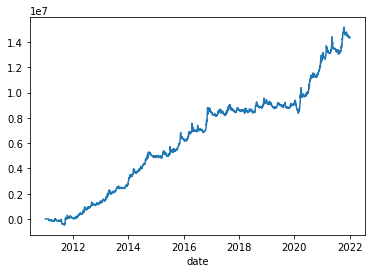

                tsmom-ewmac-commod_mkts-8-1-1-0.2
sharp_ratio_1y                           1.187581
sharp_ratio_2y                           1.787056
sharp_ratio_3y                           1.326858
sharp_ratio_4y                           1.245237
sharp_ratio_5y                           1.079404
sharp_ratio_6y                           1.205748
sharp_ratio_7y                           1.243730
sharp_ratio_8y                           1.366114
sharp_ratio_9y                           1.421218
std_pnl_1y                           98163.401837
std_pnl_2y                           95697.395643
std_pnl_3y                           82176.603757
std_pnl_4y                           75690.363796
std_pnl_5y                           72083.188507
std_pnl_6y                           72823.574419
std_pnl_7y                           71268.848662
std_pnl_8y                           69175.240486
std_pnl_9y                           66690.235410


C:\Users\harvey\AppData\Local\Temp/ipykernel_2300/2991122320.py:44: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  xdf[delimiter.join((asset + str(i), 'lr'))] = \
C:\Users\harvey\AppData\Local\Temp/ipykernel_2300/2991122320.py:64: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  xdf[delimiter.join((asset + str(1), 'basmom'))] = xdf[delimiter.join((asset + str(1), 'lr'))].rolling(win).sum() \
C:\Users\harvey\AppData\Local\Temp/ipykernel_2300/2991122320.py:66: PerformanceWarning: DataFrame is highly fragmented.  This is usually the 

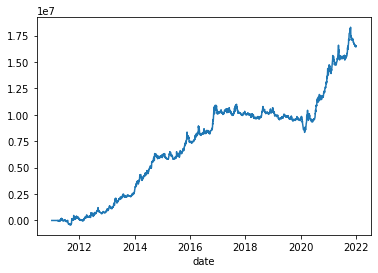

                tsmom-ewmac-commod_mkts-16-1-1-0.2
sharp_ratio_1y                            1.257919
sharp_ratio_2y                            1.714569
sharp_ratio_3y                            1.143880
sharp_ratio_4y                            1.033641
sharp_ratio_5y                            0.856319
sharp_ratio_6y                            1.019353
sharp_ratio_7y                            1.024568
sharp_ratio_8y                            1.193904
sharp_ratio_9y                            1.245586
std_pnl_1y                           136372.537363
std_pnl_2y                           132811.418002
std_pnl_3y                           112457.290823
std_pnl_4y                           101919.066380
std_pnl_5y                            96899.309497
std_pnl_6y                            97447.380421
std_pnl_7y                            95714.570493
std_pnl_8y                            94180.842568
std_pnl_9y                            90834.334690


C:\Users\harvey\AppData\Local\Temp/ipykernel_2300/2991122320.py:44: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  xdf[delimiter.join((asset + str(i), 'lr'))] = \
C:\Users\harvey\AppData\Local\Temp/ipykernel_2300/2991122320.py:64: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  xdf[delimiter.join((asset + str(1), 'basmom'))] = xdf[delimiter.join((asset + str(1), 'lr'))].rolling(win).sum() \
C:\Users\harvey\AppData\Local\Temp/ipykernel_2300/2991122320.py:66: PerformanceWarning: DataFrame is highly fragmented.  This is usually the 

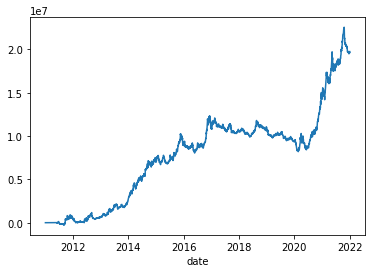

                tsmom-ewmac-commod_mkts-32-1-1-0.2
sharp_ratio_1y                            1.600061
sharp_ratio_2y                            1.787108
sharp_ratio_3y                            1.188363
sharp_ratio_4y                            1.053039
sharp_ratio_5y                            0.849317
sharp_ratio_6y                            0.880330
sharp_ratio_7y                            0.899531
sharp_ratio_8y                            1.069110
sharp_ratio_9y                            1.106674
std_pnl_1y                           215057.452696
std_pnl_2y                           189524.214379
std_pnl_3y                           159360.894579
std_pnl_4y                           142549.183913
std_pnl_5y                           134512.940472
std_pnl_6y                           133524.112283
std_pnl_7y                           131611.661147
std_pnl_8y                           130678.973016
std_pnl_9y                           125511.188466


C:\Users\harvey\AppData\Local\Temp/ipykernel_2300/2991122320.py:44: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  xdf[delimiter.join((asset + str(i), 'lr'))] = \
C:\Users\harvey\AppData\Local\Temp/ipykernel_2300/2991122320.py:64: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  xdf[delimiter.join((asset + str(1), 'basmom'))] = xdf[delimiter.join((asset + str(1), 'lr'))].rolling(win).sum() \
C:\Users\harvey\AppData\Local\Temp/ipykernel_2300/2991122320.py:66: PerformanceWarning: DataFrame is highly fragmented.  This is usually the 

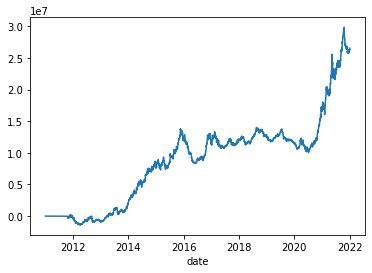

                tsmom-ewmac-commod_mkts-64-1-1-0.2
sharp_ratio_1y                            1.882401
sharp_ratio_2y                            1.840773
sharp_ratio_3y                            1.319711
sharp_ratio_4y                            1.182902
sharp_ratio_5y                            1.018817
sharp_ratio_6y                            0.848953
sharp_ratio_7y                            0.937060
sharp_ratio_8y                            1.079912
sharp_ratio_9y                            1.117724
std_pnl_1y                           335721.220139
std_pnl_2y                           267410.134568
std_pnl_3y                           225180.408636
std_pnl_4y                           201245.710588
std_pnl_5y                           192407.912363
std_pnl_6y                           187211.127065
std_pnl_7y                           188422.917070
std_pnl_8y                           185579.910224
std_pnl_9y                           177927.474508


C:\Users\harvey\AppData\Local\Temp/ipykernel_2300/2991122320.py:68: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  xdf[delimiter.join((asset + str(1), 'skew'))] = xdf[delimiter.join((asset + str(1), 'lr'))].rolling(win).skew()
C:\Users\harvey\AppData\Local\Temp/ipykernel_2300/2991122320.py:69: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  xdf[delimiter.join((asset + str(1), 'kurt'))] = xdf[delimiter.join((asset + str(1), 'lr'))].rolling(win).kurt()
C:\Users\harvey\AppData\Local\Temp/ipykernel_2300/2991122320.py:82: PerformanceW

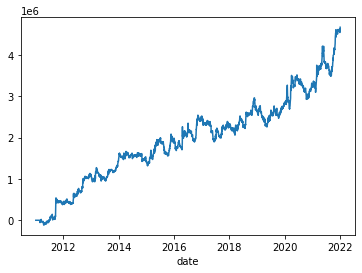

                tsmom-ewmacdff-commod_mkts-8-8-1-0.2
sharp_ratio_1y                              1.681146
sharp_ratio_2y                              1.166768
sharp_ratio_3y                              0.974629
sharp_ratio_4y                              0.901866
sharp_ratio_5y                              0.706125
sharp_ratio_6y                              0.716237
sharp_ratio_7y                              0.762058
sharp_ratio_8y                              0.692006
sharp_ratio_9y                              0.706179
std_pnl_1y                              52921.747718
std_pnl_2y                              50725.438700
std_pnl_3y                              45389.502815
std_pnl_4y                              42426.655329
std_pnl_5y                              40637.165934
std_pnl_6y                              40834.712171
std_pnl_7y                              39794.589120
std_pnl_8y                              38050.321556
std_pnl_9y                              36786.

C:\Users\harvey\AppData\Local\Temp/ipykernel_2300/2991122320.py:68: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  xdf[delimiter.join((asset + str(1), 'skew'))] = xdf[delimiter.join((asset + str(1), 'lr'))].rolling(win).skew()
C:\Users\harvey\AppData\Local\Temp/ipykernel_2300/2991122320.py:69: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  xdf[delimiter.join((asset + str(1), 'kurt'))] = xdf[delimiter.join((asset + str(1), 'lr'))].rolling(win).kurt()
C:\Users\harvey\AppData\Local\Temp/ipykernel_2300/2991122320.py:82: PerformanceW

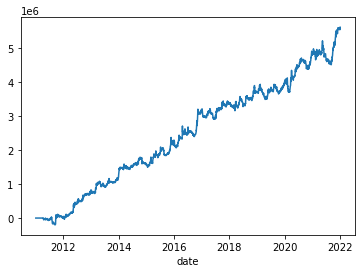

                tsmom-ewmacdff-commod_mkts-16-8-1-0.2
sharp_ratio_1y                               1.157801
sharp_ratio_2y                               1.271830
sharp_ratio_3y                               1.129093
sharp_ratio_4y                               1.033761
sharp_ratio_5y                               0.942787
sharp_ratio_6y                               1.053114
sharp_ratio_7y                               1.123520
sharp_ratio_8y                               1.111870
sharp_ratio_9y                               1.121022
std_pnl_1y                               43375.306915
std_pnl_2y                               41133.088536
std_pnl_3y                               36905.534126
std_pnl_4y                               34898.357209
std_pnl_5y                               33887.257217
std_pnl_6y                               34308.578728
std_pnl_7y                               33529.799438
std_pnl_8y                               32274.368252
std_pnl_9y                  

C:\Users\harvey\AppData\Local\Temp/ipykernel_2300/2991122320.py:68: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  xdf[delimiter.join((asset + str(1), 'skew'))] = xdf[delimiter.join((asset + str(1), 'lr'))].rolling(win).skew()
C:\Users\harvey\AppData\Local\Temp/ipykernel_2300/2991122320.py:69: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  xdf[delimiter.join((asset + str(1), 'kurt'))] = xdf[delimiter.join((asset + str(1), 'lr'))].rolling(win).kurt()
C:\Users\harvey\AppData\Local\Temp/ipykernel_2300/2991122320.py:82: PerformanceW

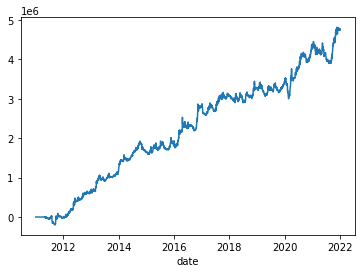

                tsmom-ewmacdff-commod_mkts-24-8-1-0.2
sharp_ratio_1y                               0.830102
sharp_ratio_2y                               1.175629
sharp_ratio_3y                               1.003015
sharp_ratio_4y                               0.893493
sharp_ratio_5y                               0.840005
sharp_ratio_6y                               1.001157
sharp_ratio_7y                               0.974562
sharp_ratio_8y                               1.025092
sharp_ratio_9y                               1.073497
std_pnl_1y                               37026.655439
std_pnl_2y                               36582.908074
std_pnl_3y                               32515.684074
std_pnl_4y                               30605.086705
std_pnl_5y                               30013.994488
std_pnl_6y                               30757.363692
std_pnl_7y                               29749.933883
std_pnl_8y                               28627.079708
std_pnl_9y                  

C:\Users\harvey\AppData\Local\Temp/ipykernel_2300/2991122320.py:68: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  xdf[delimiter.join((asset + str(1), 'skew'))] = xdf[delimiter.join((asset + str(1), 'lr'))].rolling(win).skew()
C:\Users\harvey\AppData\Local\Temp/ipykernel_2300/2991122320.py:69: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  xdf[delimiter.join((asset + str(1), 'kurt'))] = xdf[delimiter.join((asset + str(1), 'lr'))].rolling(win).kurt()
C:\Users\harvey\AppData\Local\Temp/ipykernel_2300/2991122320.py:82: PerformanceW

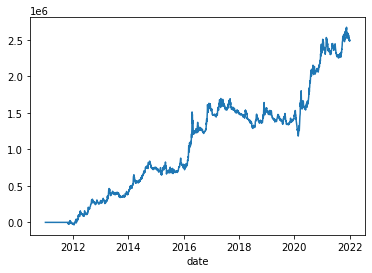

                tsmom-ewmacdff-commod_mkts-64-8-1-0.2
sharp_ratio_1y                               0.396616
sharp_ratio_2y                               1.262928
sharp_ratio_3y                               0.889823
sharp_ratio_4y                               0.766759
sharp_ratio_5y                               0.605681
sharp_ratio_6y                               0.861970
sharp_ratio_7y                               0.794258
sharp_ratio_8y                               0.873968
sharp_ratio_9y                               0.850728
std_pnl_1y                               24279.225459
std_pnl_2y                               26658.871788
std_pnl_3y                               22903.994399
std_pnl_4y                               21208.943397
std_pnl_5y                               20366.734050
std_pnl_6y                               21447.909960
std_pnl_7y                               20490.406879
std_pnl_8y                               19605.590823
std_pnl_9y                  

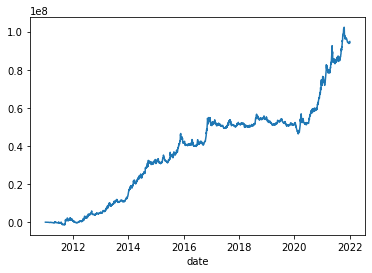

date
2021-11-22    9.580047e+07
2021-11-23    9.551531e+07
2021-11-24    9.545788e+07
2021-11-25    9.551984e+07
2021-11-26    9.521794e+07
2021-11-29    9.488047e+07
2021-11-30    9.443509e+07
2021-12-01    9.450549e+07
2021-12-02    9.436995e+07
2021-12-03    9.450365e+07
2021-12-06    9.427270e+07
2021-12-07    9.446343e+07
2021-12-08    9.445206e+07
2021-12-09    9.427403e+07
2021-12-10    9.426683e+07
2021-12-13    9.399712e+07
2021-12-14    9.401604e+07
2021-12-15    9.394352e+07
2021-12-16    9.387686e+07
2021-12-17    9.392687e+07
2021-12-20    9.371887e+07
2021-12-21    9.378694e+07
2021-12-22    9.385287e+07
2021-12-23    9.404169e+07
2021-12-24    9.422582e+07
2021-12-27    9.391636e+07
2021-12-28    9.417610e+07
2021-12-29    9.399717e+07
2021-12-30    9.428994e+07
2021-12-31    9.476669e+07
Name: daily_pnl, dtype: float64
                            0
sharp_ratio_1y       1.757521
sharp_ratio_2y       1.995643
sharp_ratio_3y       1.446867
sharp_ratio_4y       1.320902
sha

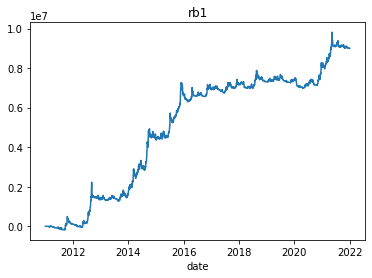

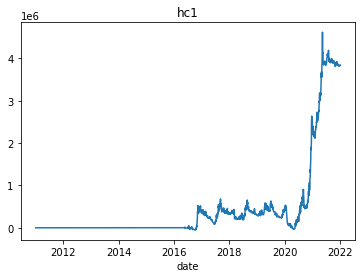

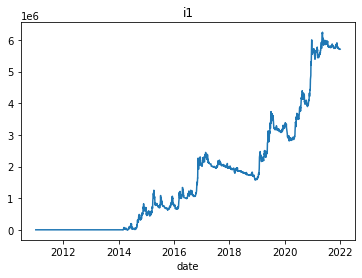

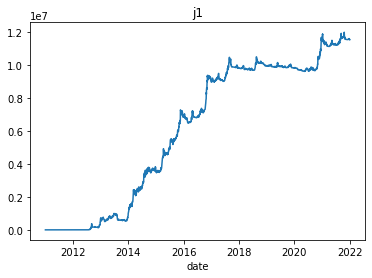

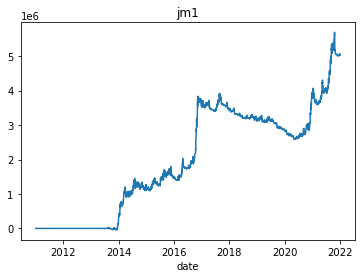

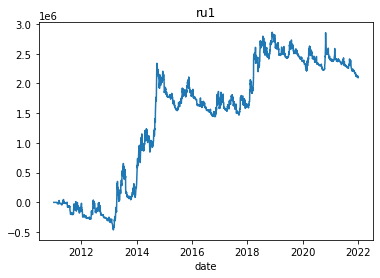

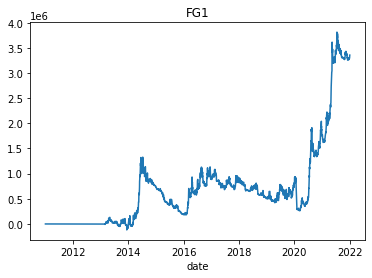

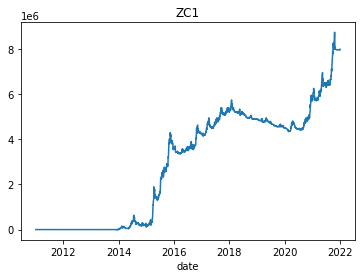

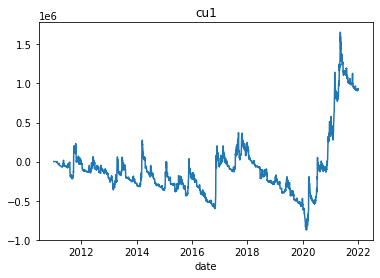

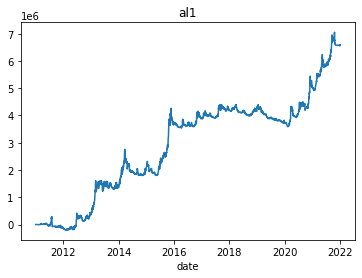

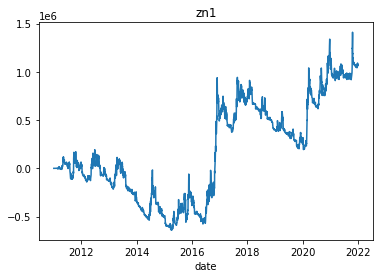

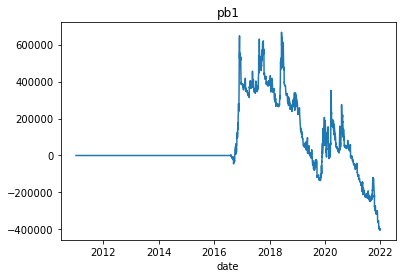

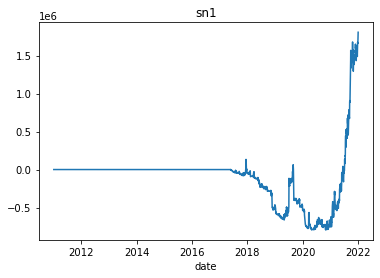

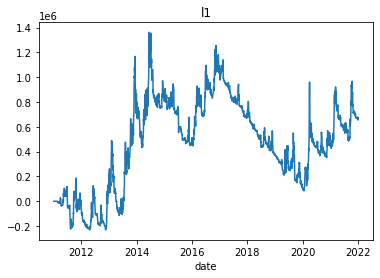

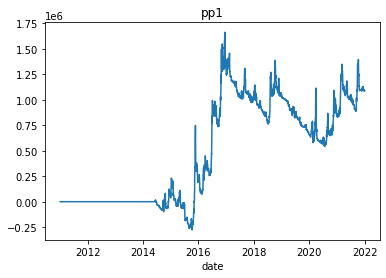

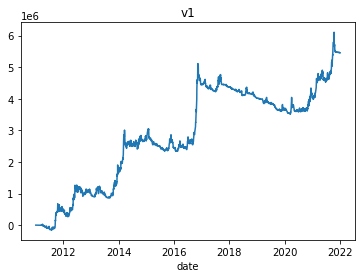

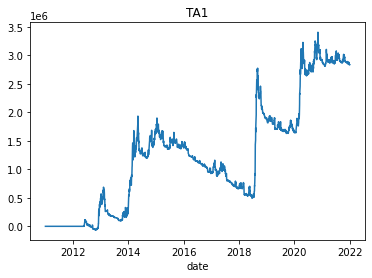

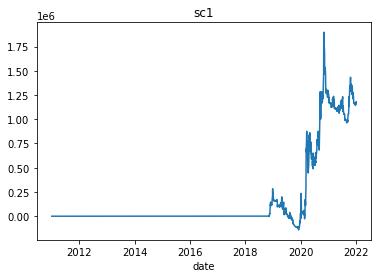

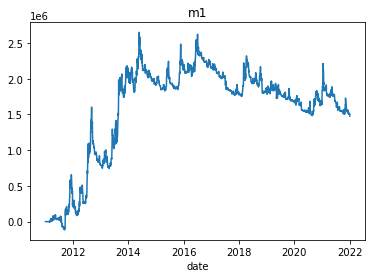

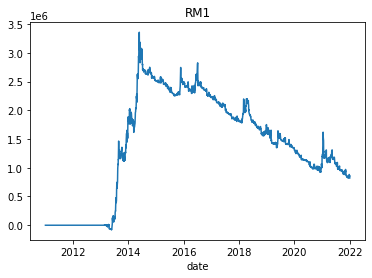

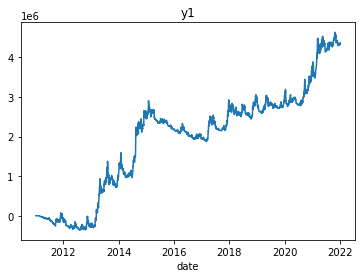

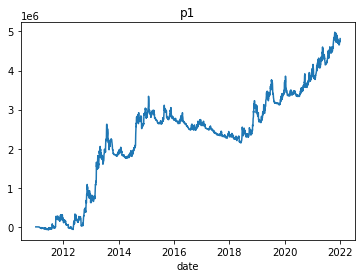

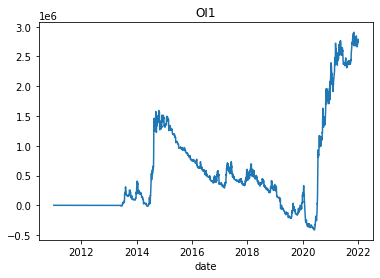

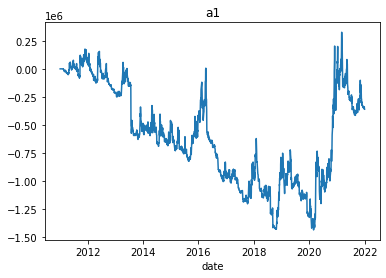

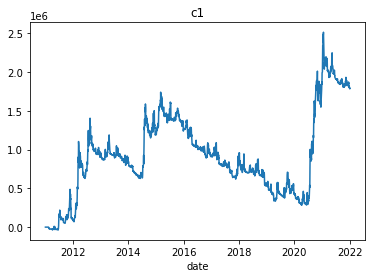

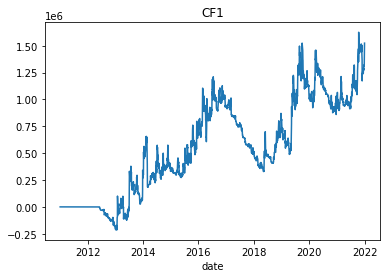

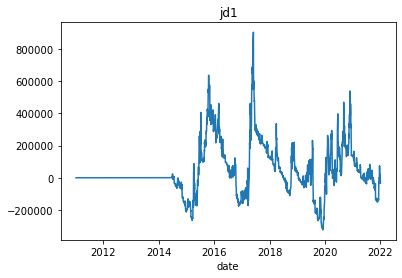

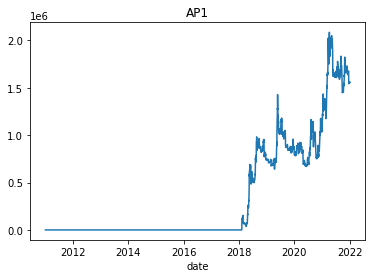

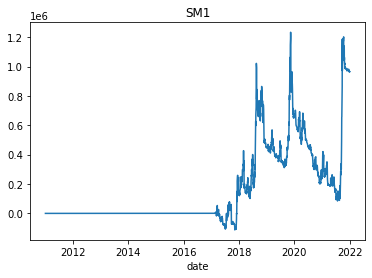

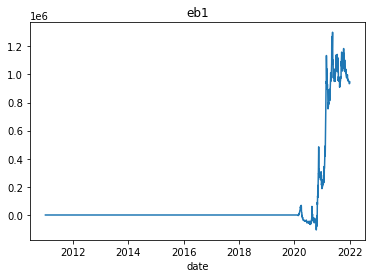

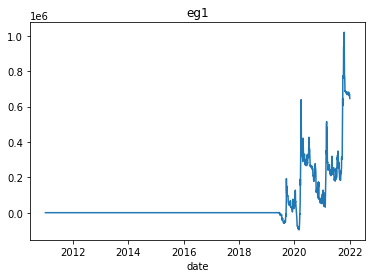

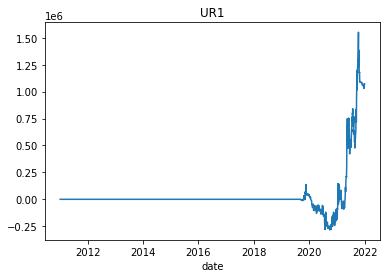

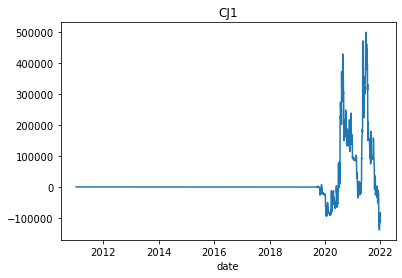

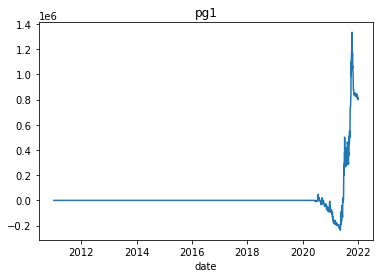

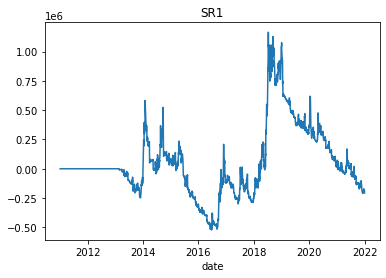

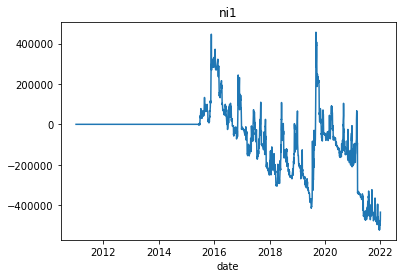

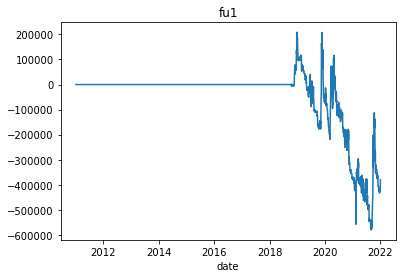

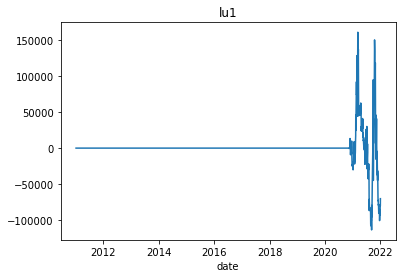

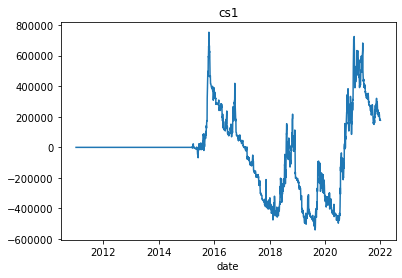

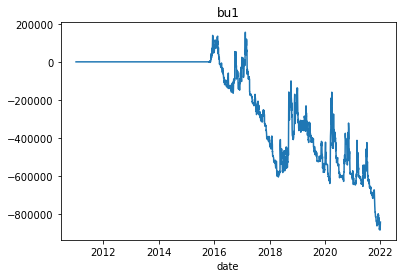

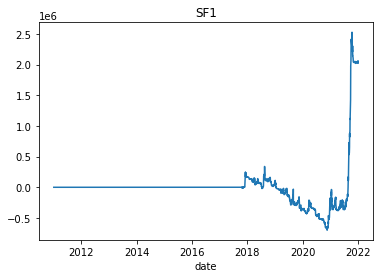

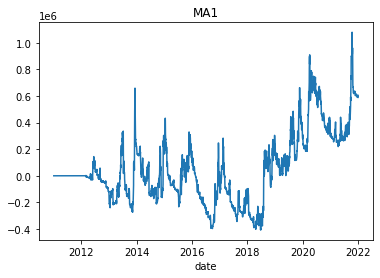

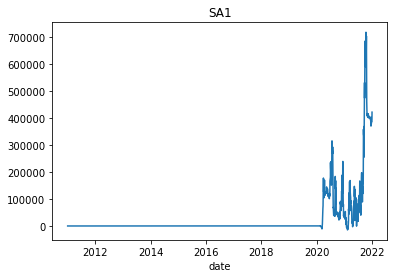

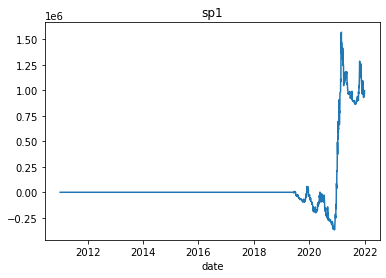

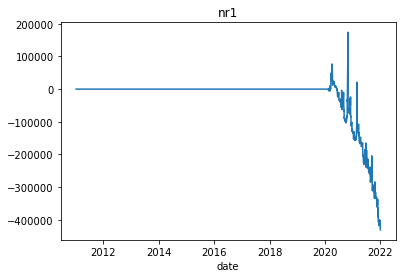

In [38]:
res = {}
stats_list = []
cum_list = []
rev_char = '!'

metal_mixed_mkts = ['rb', 'hc', 'i', 'j', 'jm', 'ru', 'FG', 'ZC', 'cu', 'al', 'zn', 'ni']
petro_mixed_mkts = ['l', 'pp', 'v', 'TA', 'MA', 'bu', 'sc']
ags_mixed_mkts = ['m', 'RM', 'y', 'p', 'OI', 'a', 'c', 'cs', 'CF', 'SR', 'jd']
commod_mkts = ['rb', 'hc', 'i', 'j', 'jm', 'ru', 'FG', 'ZC', 'cu', 'al', 'zn', 'pb', 'sn', \
               'l', 'pp', 'v', 'TA', 'sc', 'm', 'RM', 'y', 'p', 'OI', 'a', 'c', 'CF', 'jd', \
               'AP', 'SM', 'eb', 'eg', 'UR', 'CJ', 'pg', 'SR', 'ni', 'fu', 'lu', 'cs', \
               'bu', 'SF', 'MA', 'SA', 'sp', 'nr']
commod_mkts_p1 = ['rb', 'hc', 'i', 'j', 'jm', 'ru', 'FG', 'ZC', 'cu', 'al', 'zn', 'pb', 'sn', \
               'l', 'pp', 'v', 'TA', 'sc', 'm', 'RM', 'y', 'p', 'OI', 'a', 'c', 'CF', 'jd', \
               'AP', 'SM']
               ## 'au', 'ag', 'b']
commod_mkts_p2 = ['rb', 'hc', 'i', 'j', 'jm', 'ru', 'FG', 'ZC', 'cu', 'al', 'zn', 'pb', 'sn', \
               'l', 'pp', 'v', 'TA', 'sc', 'm', 'RM', 'y', 'p', 'OI', 'a', 'c', 'CF', 'jd', \
               'AP', 'SM', 'eb', 'eg', 'UR', 'CJ', 'ss', 'pg']


product_list = commod_mkts # metal_mixed_mkts # +  petro_mixed_mkts #  
# # ind_metal_mkts #commod_all_mkts #  ferrous_products_mkts #+ ferrous_mixed_mkts + base_metal_mkts
product_name = 'commod_mkts'

scenarios = scenarios_test

start_date = datetime.date(2011,1,1)
end_date = datetime.date(2021,12,31)

quantile = 0.2
cost_ratio = 0.5
total_risk = 3000.0
asset_scaling = False
pos_std = 1
std_win = 20
win = 60
ma_win = 120
rebal = 5
params = [0.0, 0.0]
pos_map = (None, {}, '')

exec_field = 'open'

save_loc = "C:\\dev\\data\\combined_carry_" + product_name + "_" + str(end_date) + '_'

run_pos_sum = True
pos_sum = pd.DataFrame()
dpnl_sum = pd.DataFrame()
pos_list = []

port_pnl = pd.Series()
dpnl_by_scen = [] 

for scen in scenarios:
    if len(scen) >= 8:
        sim_name = scen[0]
        if 'ts' in sim_name:
            sim_func = run_ts_test
        elif 'xs' in sim_name:
            sim_func = run_xs_test
            if len(scen) == 9:
                quantile = scen[8]
        run_mode = scen[1]
        weight = scen[2]
        win = scen[3]
        ma_win = scen[4]
        rebal = scen[5]
        pos_map = scen[6]
        params = scen[7]        
    else:
        print("unsupported scenarios")
        continue
    run_args = {}        
    run_args['run_name'] = run_name = '-'.join([sim_name, run_mode, product_name, str(win), str(ma_win), str(rebal), str(quantile)])
    run_args['cost_ratio'] = cost_ratio
    run_args['total_risk'] = total_risk
    run_args['asset_scaling'] = asset_scaling
    run_args['exec_field'] = exec_field
    run_args['product_list'] = product_list
    run_args['start_date'] = start_date
    run_args['end_date'] = end_date
    
    run_args['win'] = win
    run_args['ma_win'] = ma_win
    run_args['std_win'] = std_win
    run_args['prefix'] = save_loc        
    run_args['rebal_freq'] = rebal
    run_args['pos_std'] = pos_std
    run_args['params'] = params
    run_args['pos_map'] = pos_map
    run_args['run_mode'] = run_mode
    run_args['quantile'] = quantile
    res = sim_func(run_args)
    res['cum_pnl'].plot()
    plt.show()
    cum_list.append(res['cum_pnl'])
    stats_list.append(res['pnl_stats'])
    vdf = res['pnl_stats']
    vdf = vdf.loc[[idx for idx in vdf.index if ('sharp' in idx) or ('std' in idx)], :]
    print(vdf)
    if run_pos_sum:
        pos_list.append(res['pos_df'])
        dpnl_by_scen.append(res['cum_pnl'].diff().dropna())
        pos_sum = pos_sum.add(res['pos_df'] * weight, fill_value = 0) 
        dpnl_sum = dpnl_sum.add(res['dpnl'] * weight, fill_value = 0) 
        port_pnl = port_pnl.add(res['cum_pnl'] * weight, fill_value = 0)

port_pnl.plot()
port_pnl.name = 'daily_pnl'
plt.show()
res_pnl = backtest.pnl_stats_by_tenor(port_pnl.diff().dropna(), tenors = pnl_tenors, field = None)
vdf = pd.DataFrame.from_dict(res_pnl, orient='index').sort_index()
vdf = vdf.loc[[idx for idx in vdf.index if ('sharp' in idx) or ('std' in idx)], :]
print(port_pnl[-30:])
print(vdf)
port_pnl.to_csv(file_folder + "port_pnl.csv")
cpnl = dpnl_sum.cumsum()
for col in cpnl.columns:
    cpnl[col].plot(title = col)
    plt.show()


In [18]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { height:200% !important;}</style>"))

          rb-pos      hc-pos       i-pos      j-pos     jm-pos     ru-pos  \
0       0.000000    0.000000    0.000000   0.000000   0.000000   0.000000   
1       0.000000    0.000000    0.000000   0.000000   0.000000   0.000000   
2       0.000000    0.000000    0.000000   0.000000   0.000000   0.000000   
3       0.000000    0.000000    0.000000   0.000000   0.000000   0.000000   
4       0.000000    0.000000    0.000000   0.000000   0.000000   0.000000   
...          ...         ...         ...        ...        ...        ...   
2518  116.251255   99.098959   26.893155  13.788628  14.145129  -9.189967   
2519  122.148019   98.122491   51.118245  10.939379  21.958378 -12.584522   
2520  127.861519  100.719599   95.498011   5.114695  31.342067 -18.051788   
2521  107.110826   93.338886  152.998094   9.974778  39.995558 -22.669545   
2522   94.329129   87.810734  176.757550  -2.373315  25.851582 -24.175275   

          FG-pos      ZC-pos    cu-pos     al-pos  ...      RM-pos     y-po

<ipython-input-12-0a172ac03eb7>:23: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  pnl_dict[scen[0]][scen[1]] = pd.Series()


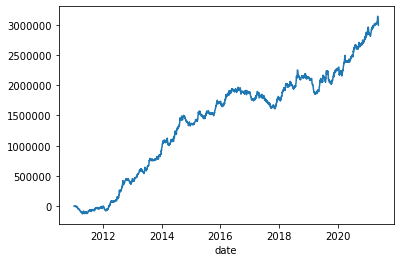

                            0
sharp_ratio_10y      1.495793
sharp_ratio_1y       2.254041
sharp_ratio_2y       1.909702
sharp_ratio_3y       1.276970
sharp_ratio_4y       1.214613
sharp_ratio_5y       0.909643
sharp_ratio_6y       1.093754
sharp_ratio_8y       1.379338
std_pnl_10y      13563.657135
std_pnl_1y       16336.653302
std_pnl_2y       16988.767995
std_pnl_3y       15928.542887
std_pnl_4y       15616.463667
std_pnl_5y       15283.845649
std_pnl_6y       14895.535288
std_pnl_8y       14376.153019
sim_name = xsfact, run_mode = upstdsma


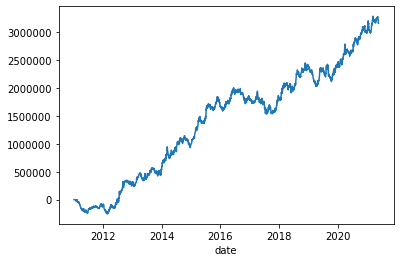

                            0
sharp_ratio_10y      1.183885
sharp_ratio_1y       1.599953
sharp_ratio_2y       1.347924
sharp_ratio_3y       1.109045
sharp_ratio_4y       1.090071
sharp_ratio_5y       0.790669
sharp_ratio_6y       0.962540
sharp_ratio_8y       1.166865
std_pnl_10y      18509.387625
std_pnl_1y       20857.058735
std_pnl_2y       22136.671971
std_pnl_3y       21306.468277
std_pnl_4y       21203.484398
std_pnl_5y       20495.275952
std_pnl_6y       20052.202992
std_pnl_8y       19507.190735
sim_name = xsfact, run_mode = volmfratiosma


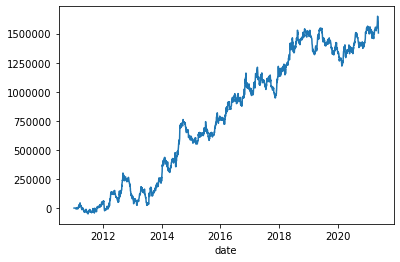

                            0
sharp_ratio_10y      0.757524
sharp_ratio_1y       0.551798
sharp_ratio_2y      -0.082112
sharp_ratio_3y       0.164019
sharp_ratio_4y       0.422507
sharp_ratio_5y       0.526894
sharp_ratio_6y       0.664488
sharp_ratio_8y       0.798237
std_pnl_10y      13228.451805
std_pnl_1y       12703.222301
std_pnl_2y       12566.397856
std_pnl_3y       12876.046370
std_pnl_4y       13745.366358
std_pnl_5y       14696.435414
std_pnl_6y       14358.477669
std_pnl_8y       13968.050183
corr for sim_name = xsfact
          0         1         2
0  1.000000  0.722014  0.494653
1  0.722014  1.000000  0.335202
2  0.494653  0.335202  1.000000
combined pnl for sim_name = xsfact


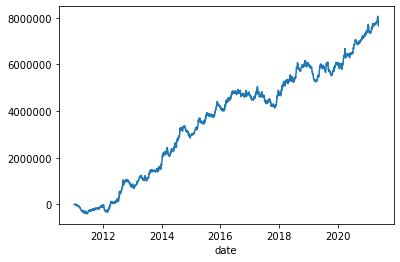

                            0
sharp_ratio_10y      1.371337
sharp_ratio_1y       2.061969
sharp_ratio_2y       1.493406
sharp_ratio_3y       1.143496
sharp_ratio_4y       1.159447
sharp_ratio_5y       0.912007
sharp_ratio_6y       1.106406
sharp_ratio_8y       1.347608
std_pnl_10y      38081.276082
std_pnl_1y       37441.601057
std_pnl_2y       41013.743457
std_pnl_3y       40299.236332
std_pnl_4y       41303.121065
std_pnl_5y       41503.275031
std_pnl_6y       40793.485668
std_pnl_8y       39879.285157
     0
0  1.0
combined pnl for sim_name = xsfact


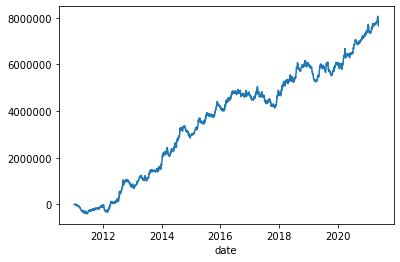

                            0
sharp_ratio_10y      1.371337
sharp_ratio_1y       2.061969
sharp_ratio_2y       1.493406
sharp_ratio_3y       1.143496
sharp_ratio_4y       1.159447
sharp_ratio_5y       0.912007
sharp_ratio_6y       1.106406
sharp_ratio_8y       1.347608
std_pnl_10y      38081.276082
std_pnl_1y       37441.601057
std_pnl_2y       41013.743457
std_pnl_3y       40299.236332
std_pnl_4y       41303.121065
std_pnl_5y       41503.275031
std_pnl_6y       40793.485668
std_pnl_8y       39879.285157


In [12]:
cum_df = pd.concat(cum_list, axis = 1)
cum_df.to_csv(save_loc + 'pnl.csv')
stats_df = pd.concat(stats_list, axis = 1)
stats_df.T.to_csv(save_loc + 'stats.csv')
if run_pos_sum:    
    print(pos_sum)

cutoff_date = datetime.date(2016,1,1)

dpnl_cutoff = []
for dpnl in dpnl_by_scen:
    dpnl_cutoff.append(dpnl[dpnl.index >= cutoff_date])

combo_dpnl = pd.concat(dpnl_cutoff, axis = 1)
combo_dpnl.columns = [ '_'.join([scen[0], scen[1], str(idx)]) for idx, scen in enumerate(scenarios)]
    
combo_dpnl.corr().to_csv(file_folder + "port_corr.csv")
pnl_dict = {}    
for idx, (scen, dpnl) in enumerate(zip(scenarios, dpnl_by_scen)):    
    if scen[0] not in pnl_dict:
        pnl_dict[scen[0]] = {}
    if scen[1] not in pnl_dict[scen[0]]:
        pnl_dict[scen[0]][scen[1]] = pd.Series()
    pnl_dict[scen[0]][scen[1]] = pnl_dict[scen[0]][scen[1]].add(dpnl * scen[2], fill_value = 0)

pnl_by_sim = []
for sim_name in pnl_dict:
    pnl_list = []
    for run_mode in pnl_dict[sim_name]:
        print("sim_name = %s, run_mode = %s" % (sim_name, run_mode))
        pnl_list.append(pnl_dict[sim_name][run_mode])
        cpnl = pnl_dict[sim_name][run_mode].cumsum()        
        cpnl.plot()
        plt.show()
        res_pnl = backtest.pnl_stats_by_tenor(pnl_dict[sim_name][run_mode].dropna(), tenors = pnl_tenors, field = None)
        vdf = pd.DataFrame.from_dict(res_pnl, orient='index').sort_index()
        vdf = vdf.loc[[idx for idx in vdf.index if ('sharp' in idx) or ('std' in idx)], :]
        print(vdf)            
    print("corr for sim_name = %s" % sim_name)
    xdf = pd.concat(pnl_list, axis = 1)
    tdf = xdf[xdf.index >= cutoff_date]
    print(tdf.corr())
    print("combined pnl for sim_name = %s" % sim_name)
    adf = xdf.sum(axis=1)
    pnl_by_sim.append(adf)
    adf.cumsum().plot()
    plt.show()
    res_pnl = backtest.pnl_stats_by_tenor(adf.dropna(), tenors = pnl_tenors, field = None)
    vdf = pd.DataFrame.from_dict(res_pnl, orient='index').sort_index()
    vdf = vdf.loc[[idx for idx in vdf.index if ('sharp' in idx) or ('std' in idx)], :]
    print(vdf)
xdf = pd.concat(pnl_by_sim, axis = 1)
tdf = xdf[xdf.index >= cutoff_date]
print(tdf.corr())
print("combined pnl for sim_name = %s" % sim_name)
adf = xdf.sum(axis=1)
pnl_by_sim.append(adf)
adf.cumsum().plot()
plt.show()
res_pnl = backtest.pnl_stats_by_tenor(adf.dropna(), tenors = pnl_tenors, field = None)
vdf = pd.DataFrame.from_dict(res_pnl, orient='index').sort_index()
vdf = vdf.loc[[idx for idx in vdf.index if ('sharp' in idx) or ('std' in idx)], :]
print(vdf)

In [13]:
save_xl = True
if run_pos_sum and save_xl:
    xlfile = save_loc + "pos_data.xlsx"
    writer = pd.ExcelWriter(xlfile)
    for idx in range(len(pos_list)):            
        pos_list[idx].to_excel(writer, str(idx), startcol= 0, startrow=1)
    pos_sum.to_excel(writer, "sum", startcol= 0, startrow=1)
    writer.save()    


In [9]:
print(df)

           index  rb1-open  rb1-high  rb1-low  rb1-close  rb1-volume  \
0     2011-01-04    2373.0    2386.0   2348.0     2365.0      275428   
1     2011-01-05    2343.0    2360.0   2332.0     2336.0      214902   
2     2011-01-06    2349.0    2368.0   2345.0     2352.0      186136   
3     2011-01-07    2343.0    2371.0   2320.0     2336.0      369032   
4     2011-01-10    2344.0    2394.0   2344.0     2377.0      436038   
...          ...       ...       ...      ...        ...         ...   
2499  2021-04-19    5122.0    5143.0   5058.0     5082.0     2509136   
2500  2021-04-20    5091.0    5171.0   5070.0     5165.0     2137195   
2501  2021-04-21    5158.0    5189.0   5125.0     5188.0     2026507   
2502  2021-04-22    5195.0    5238.0   5175.0     5208.0     2569897   
2503  2021-04-23    5225.0    5300.0   5205.0     5299.0     2115301   

      rb1-openInterest rb1-contract  rb1-shift  rb1-contmth  ...  AP2-open  \
0               576934       rb1105    -2457.0       2011